# IMPORT

In [1]:
import os
from os import path
from os import listdir
import glob
import pathlib
from astropy.io import fits
from operator import itemgetter, attrgetter
from shapely.geometry import box, Point 
from shapely.ops import unary_union
import shutil
import plotly.graph_objects as go
import numpy as np
from astropy.io import ascii
import math
from plotly.offline import plot
import plotly.figure_factory as ff
from astropy import wcs
from astropy.convolution import Gaussian2DKernel, convolve
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
%matplotlib inline
np.set_printoptions(precision=2)
pd.set_option('display.max_rows', None)

# Define REGIONS numbers

In [35]:
# bad_regs is defined in individual fitting section
regs = [i for i in range(100) if i not in zeros+out_regs]

## define regions with non-zero values

In [17]:
#regs=[11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 41, 42, 43, 44, 45, 46, 47, 48, 51, 52, 53, 54, 55, 56, 57, 58, 61, 62, 63, 64, 65, 66, 67, 68, 71, 72, 73, 74, 75, 76, 77, 78, 81, 82, 83, 84, 85, 86, 87, 88]
zeros = [0, 9, 80, 90, 91, 97, 99]

## define outer ring regions

In [34]:
out_regs = [i for i in range(10)] + [i*10 for i in range(1,10)] + [i+90 for i in range(1,10)] + [i*10+9 for i in range(1,10)]

## define reigons with more than 10 pointings for mathpha

In [639]:
outers = [32, 33, 56, 63]

# Define Pointing Names

In [641]:
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong'
names = [name for name in os.listdir(DIR) if '0' in name and len(name) == 10]
names.sort()
print(names, len(names))

['0203360101', '0203360201', '0203360301', '0203360401', '0203360501', '0203360601', '0203360701', '0203360801', '0203360901', '0203361001', '0203361101', '0203361201', '0203361301', '0203361401', '0203361501', '0203361601', '0203361701', '0203361801', '0203361901', '0203362001', '0203362101', '0203362201', '0203362301', '0203362401', '0203362501', '0302350101', '0302350201', '0302350301', '0302350401', '0302350501', '0302350601', '0302350701', '0302350801', '0302350901', '0302351001', '0302351101', '0302351201', '0302351301', '0302351401', '0302351501', '0302351601', '0302351701', '0302351801', '0302351901', '0302352001', '0302352201', '0302352301', '0302352401', '0302352501', '0302353001', '0302353101', '0302353201', '0302353301', '0302353401', '0501170101', '0501170201'] 56


## remove bad pointing 0302352401

In [644]:
if '0302352401' in names:
    names.remove('0302352401')

In [ ]:
for i in range(0,100):
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-obj-os-phs1-reg{i}.pi'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-back-phs1-reg{i}.pi'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-phs1-reg{i}.arf'
    if path.exists(f):
        os.remove(f)
    f = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}/0302352401-pnS005-phs1-reg{i}.rmf'
    if path.exists(f):
        os.remove(f)

# Define RA, DEC for REGIONS

In [5]:
ras,decs,coords=[],[],[]
for name in names:
    with fits.open(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/pnS005-cheese.fits') as hdu:
        header=hdu[0].header
        ra=header['CRVAL1']
        dec=header['CRVAL2']
        ras.append(ra)
        decs.append(dec)
        coords.append([ra,dec])

In [6]:
ras.sort()
decs.sort()
print(ras[0],ras[-1],ras[-1]-ras[0])
print(decs[0],decs[-1],decs[-1]-decs[0])

149.601583 150.6315 1.0299169999999833
1.68194444 2.75447222 1.0725277799999997


In [7]:
sorted(coords, key=itemgetter(0,1))

[[149.601583, 2.48797222],
 [149.604875, 2.73788889],
 [149.615, 1.69841667],
 [149.61675, 2.19905556],
 [149.617083, 1.68194444],
 [149.617083, 2.18258333],
 [149.617333, 1.69988889],
 [149.617333, 1.93291667],
 [149.6175, 2.19830556],
 [149.631917, 1.93186111],
 [149.633708, 1.93225],
 [149.634, 2.433],
 [149.836875, 2.73786111],
 [149.849833, 1.68319444],
 [149.849833, 2.1825],
 [149.850542, 1.68333333],
 [149.854375, 2.48763889],
 [149.854458, 1.98819444],
 [149.85475, 2.73791667],
 [149.85525, 2.23727778],
 [149.866667, 2.44911111],
 [149.866833, 1.68241667],
 [149.866833, 1.94922222],
 [150.102417, 1.73758333],
 [150.103125, 2.25430556],
 [150.103958, 2.73797222],
 [150.104167, 2.23755556],
 [150.10475, 2.48797222],
 [150.105583, 1.98777778],
 [150.116583, 1.69791667],
 [150.116875, 2.69916667],
 [150.119792, 2.48777778],
 [150.12075, 1.98797222],
 [150.132932, 1.93180556],
 [150.336542, 1.73647222],
 [150.337167, 2.23838889],
 [150.348958, 2.68219444],
 [150.352708, 1.73730556],

## Center of Whole Field

In [59]:
print('the center is:',(ras[0]+ras[-1])/2,(decs[0]+decs[-1])/2)

the center is: 150.11654149999998 2.21820833


## Center of each region

In [8]:
centers=[]
ra_up=(ras[0]+ras[-1])/2+45/60.
ra_down=(ras[0]+ras[-1])/2-45/60.
dec_up=(decs[0]+decs[-1])/2+45/60.
dec_down=(decs[0]+decs[-1])/2-45/60.
for i in range(0,10):
    for j in range(0,10):
        centers.append((ra_down+i*10/60.,dec_down+j*10/60.))
centers

[(149.36654149999998, 1.46820833),
 (149.36654149999998, 1.6348749966666667),
 (149.36654149999998, 1.8015416633333332),
 (149.36654149999998, 1.96820833),
 (149.36654149999998, 2.1348749966666665),
 (149.36654149999998, 2.3015416633333334),
 (149.36654149999998, 2.46820833),
 (149.36654149999998, 2.6348749966666665),
 (149.36654149999998, 2.8015416633333334),
 (149.36654149999998, 2.96820833),
 (149.53320816666664, 1.46820833),
 (149.53320816666664, 1.6348749966666667),
 (149.53320816666664, 1.8015416633333332),
 (149.53320816666664, 1.96820833),
 (149.53320816666664, 2.1348749966666665),
 (149.53320816666664, 2.3015416633333334),
 (149.53320816666664, 2.46820833),
 (149.53320816666664, 2.6348749966666665),
 (149.53320816666664, 2.8015416633333334),
 (149.53320816666664, 2.96820833),
 (149.69987483333333, 1.46820833),
 (149.69987483333333, 1.6348749966666667),
 (149.69987483333333, 1.8015416633333332),
 (149.69987483333333, 1.96820833),
 (149.69987483333333, 2.1348749966666665),
 (149

In [65]:
with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg','at') as fout:
    for center in centers:
        print(center[0],center[1],file=fout)

In [80]:
# f = open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg')
tempx,tempy=[],[]
# lines = f.readlines()
# for line in lines:
#     tempx.append(line.split()[0])
#     tempx.append(line.split()[1])
# f.close()
for line in open('/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg'):
    tempx.append(line.split()[0])
    tempy.append(line.split()[1])

# Define FUNCTIONS

## region(cx,cy,hw,i)

In [20]:
def region(cx,cy,hw,i):
    """
    This function calculates corner coords of a box region
    
    Arguments:
    * cx: center x coord 
    * cy: center y coord
    * hw: halfwidth 
    * i: corner number
    """
    assert (0 < i <= 4), "region number must be in (1-4)" 
    if i == 1:
        detx = cx - hw
        dety = cy + hw
    elif i == 2:
        detx = cx + hw
        dety = cy + hw
    elif i == 3:
        detx = cx - hw
        dety = cy - hw
    elif i == 4:
        detx = cx + hw
        dety = cy - hw
    return detx, dety
    

## get_grids(infile)

In [21]:
def get_grids(infile):
    """Generate grid boxes
     
     Arguments:
    * centers: center ra, dec for grids
    * boxes: box coords for grids
    
    """
    centers, boxes = [], []
    for line in open(infile):
        centers.append((float(line.split()[0]),float(line.split()[1])))
    for center in centers:
        minx = center[0] - 5/60.
        miny = center[1] - 5/60.
        maxx = center[0] + 5/60.
        maxy = center[1] + 5/60.
        b = box(minx, miny, maxx, maxy)
        boxes.append(b)
    return centers, boxes

## test_file_exist(infile)

In [22]:
def test_file_exist(infile):
    """ Test if file exists or has content
     
     Arguments:
    * flag: 0 = file exists or has content
    * infile: file name
    
    """
    flag = 0
    if path.exists(infile) == False:
        with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/error.log', 'at') as fout:
            print(infile, 'does not exists!', file=fout)
        flag = 1
    else:
        with open(infile, 'r') as f:
            lines = f.readlines()
        if len(lines) == 0:
            with open('/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/error.log', 'at') as fout:
                print(infile, 'does not have content!', file=fout)
            flag = 1 
    return flag

## standardize(arr)

In [23]:
def standardize(arr):
    """
    This function convert an numpy array to standard units(z-score)
    """
    ave = np.average(arr)
    std = np.std(arr)
    new_arr=np.zeros(len(arr))
    for i in range(len(arr)):
        new_ele = (arr[i]-ave)/std
        new_arr[i] = new_ele        
    return new_arr

## heatmap_values(regs,z)

In [24]:
def heatmap_values(regs,z):
    """
    This function produces array 'values',
    text array 'texts' for heatmap_plot and annotated_heatmap
    
    Arguments:
    * regs: valid regions
    * z: array for fitting parameters, such as EM, kT...
    """
    values = np.zeros((10,10))
    texts = np.empty((10,10),dtype=object)
    for x in range(10):
        for y in range(10):
            i = x*10+y
            if i in regs:
                index = regs.index(i)
                values[x][y] = z[index]
            texts[x][y] = str(int(i))
    return values, texts

## heatmap_plot
## (values,zmin=-1000,zmax=1000,ras,decs,title='heatmap',xaxis='x',yaxis='y')

In [42]:
def heatmap_plot(values,ras,decs,title='heatmap',xaxis='x',yaxis='y',zmin=-1000,zmax=1000):
    """
    This function plots heatmap
    
    Arguments:
    * values: data array for heatmap
    * zmin: min value to plot
    * zmax: max value to plot 
    * ras: ra array for x-axis ticks
    * decs: dec array for y-axis ticks
    * title: plot title
    * xaxis: x-axis label
    * yaxis: y-axis label
    """
    fig = go.Figure(data=go.Heatmap(
                        z=values,
                        zmin=zmin,
                        zmax=zmax,
                        x=ras,
                        y=decs))

    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
        title=title,
        #title="Reduced Chi Square",
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        xaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = ras,
            ticktext = ras,
        ),
        yaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = decs,
            ticktext = decs,
        )
    )

    plot(fig);

## annotated_heatmap
## (values,texts,ras,decs,zmin=-1000,zmax=1000,title='heatmap',xaxis='x',yaxis='y')

In [26]:
def annotated_heatmap(values,texts,ras,decs,zmin=-1000,zmax=1000,title='heatmap',xaxis='x',yaxis='y'):
    """
    This function plots annotated heatmap
    
    Arguments:
    * values: data array for heatmap
    * texts: annotation texts
    * zmin: min value to plot
    * zmax: max value to plot 
    * ras: ra array for x-axis ticks
    * decs: dec array for y-axis ticks
    * title: plot title
    * xaxis: x-axis label
    * yaxis: y-axis label
    """
    fig = ff.create_annotated_heatmap(z=values,x=ras,y=decs,annotation_text=texts,showscale=True)

    fig.update_layout(
        autosize=False,
        width=1000,
        height=1000,
        title=title,
        xaxis_title=xaxis,
        yaxis_title=yaxis,
        xaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = ras,
            ticktext = ras,
        ),
        yaxis = dict(
            tickmode = 'array',
            #tickvals = [50, 150, 250, 350, 450, 550, 650, 750, 850, 950],
            tickvals = decs,
            ticktext = decs,
        )
    )

    plot(fig);

## read_spectra(DIR, name, skiprows=3)

In [27]:
def read_spectra(DIR, name, skiprows=3):
    """
    This function reads qdp spectra files
    
    Arguments:
    * DIR: file directory
    * name: file name
    * skiprows: skip first number of rows
    """
    DIR = DIR
    cols = ['x','x_err','y','y_err','back','back_err']
    df = pd.read_table(path.join(DIR,name),skiprows=skiprows,names=cols,delimiter=' ')
    return df
    #df.head(10)

## plot_spectra(title,df)

In [28]:
def plot_spectra(title,df):
    """
    This function plot qdp spectra files
    from dataframe return from read_spectra
    Arguments:
    * title: title
    * df: pandas dataframe
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax.errorbar(df.x, df.y, xerr=df.x_err,yerr=df.y_err,fmt='.-',label='data')
    ax.errorbar(df.x, df.back, xerr=df.x_err,yerr=df.back_err,color='red',fmt='*-',label='background')
    ax.set_xlabel('Energy (keV)')
    ax.set_ylabel('Normalized Counts/s/keV')
    ax.set_title(title)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.grid()
    ax.legend()
    plt.show();

## read_fit(DIR,name,skiprows=3)

In [29]:
def read_fit(DIR,name,skiprows=3):
    """
    This function reads qdp spectra fitting files
    
    Arguments:
    * DIR: file directory
    * name: file name
    * skiprows: skip first number of rows
    """
    DIR = DIR
    cols = ['x','x_err','y','y_err','res','res_err','total','model']
    df = pd.read_table(path.join(DIR,name),skiprows=skiprows,names=cols,delimiter=' ')
    return df

## plot_model(title,df)

In [30]:
def plot_model(title,df):
    """
    This function plot qdp spectra fitting files
    from dataframe return from read_fitting
    Arguments:
    * title: title
    * df: pandas dataframe
    """
    fig, ax = plt.subplots(figsize=(10,6))
    ax.errorbar(df.x, df.y, xerr=df.x_err,yerr=df.y_err,fmt='.-',label='data')
    ax.errorbar(df.x, df.res, xerr=df.x_err,yerr=df.res_err,color='black',fmt='*-',label='background')
    ax.plot(df.x, df.model, label='model')
    ax.set_xlabel('Energy (keV)')
    ax.set_ylabel('Normalized Counts/s/keV')
    ax.set_title(title)
    ax.set_xscale('linear')
    ax.set_yscale('linear')
    ax.grid()
    ax.legend()
    plt.show();

# Unit Tests

In [23]:
!pytest region_phase1.py

============================= test session starts ==============================
platform linux -- Python 3.8.3, pytest-5.4.3, py-1.9.0, pluggy-0.13.1
rootdir: /raid2/dxb/xmm/analysis/COSMOS/sicong/scripts
collected 1 item                                                               

region_phase1.py .                                                       [100%]

============================== 1 passed in 2.06s ===============================


# Define shapely regions

In [10]:
grid_center_file = '/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg'
box_centers, boxes = get_grids(grid_center_file)

In [76]:
r = 15/60.
i = '0302353201'
DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{i}/analysis/'
with fits.open(path.join(DIR, 'pnS005-cheese.fits')) as hdu:
    header = hdu[0].header
    x = header['CRVAL1']
    y = header['CRVAL2']
circle = Point(x,y).buffer(r)

In [57]:
nums = []
for i in range(0,len(boxes)):
        if boxes[i].intersects(circle) or circle.contains(boxes[i]):
            if boxes[i].intersection(circle).area >= 0.007:
                nums.append(i)
nums

[4, 5, 13, 14, 15, 23, 24, 25, 34, 35]

In [142]:
drt = '/raid2/dxb/xmm/analysis/COSMOS/sicong/{}/analysis/'.format('0203360101')
infile = drt+'pnS005-bkg_region-det.fits'
infile

'/raid2/dxb/xmm/analysis/COSMOS/sicong/0203360101/analysis/pnS005-bkg_region-det.fits'

In [148]:
%run '/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/region_radec_phase1.py'

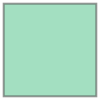

In [77]:
boxes[23].intersection(circle)

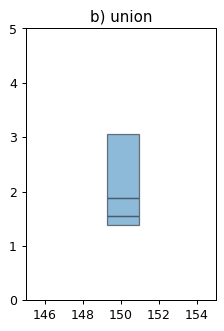

In [222]:
from matplotlib import pyplot
from shapely.geometry import Point
from shapely.ops import unary_union
from descartes import PolygonPatch

#from figures import  BLUE, GRAY, set_limits

polygons = boxes + [circle]

fig = pyplot.figure(1,  dpi=90)

# 1
# ax = fig.add_subplot(121)

# for ob in polygons:
#     p = PolygonPatch(ob, fc=GRAY, ec=GRAY, alpha=0.5, zorder=1)
#     ax.add_patch(p)

# ax.set_title('a) polygons')

# set_limits(ax, -2, 6, -2, 2)

#2
ax = fig.add_subplot(122)

u = unary_union(polygons)
patch2b = PolygonPatch(u, alpha=0.5, zorder=2)
ax.add_patch(patch2b)

ax.set_title('b) union')

ax.set_xlim([145, 155])
ax.set_ylim([0, 5])


#set_limits(ax, -2, 6, -2, 2)

pyplot.show()

In [59]:
print('reg:','intersection area(deg^2)')
print('------------------------')
for num in nums:
    m=boxes[num].intersection(circle)
    print(num,':',m.area)

reg: intersection area(deg^2)
------------------------
4 : 0.01216432848307976
5 : 0.007700119038399983
13 : 0.016420655540980503
14 : 0.027777777777780985
15 : 0.02761127654668044
23 : 0.016490018233810903
24 : 0.027777777777780985
25 : 0.0276289855195939
34 : 0.012344828483088252
35 : 0.007862910065495176


In [60]:
boxes[23].intersects(circle)

True

In [147]:
box_centers[68]

(150.36654149999998, 2.8015416633333334)

# Check if all spectra files are produced

In [155]:
drt = '/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360101/analysis/'
infile = drt + 'reg-center-det.reg'
flag = test_file_exist(infile)
flag

0

In [160]:
for line in open(infile):
    print(float(line.split()[1]), end=',')
    print(line.split()[2])

-8987.5,-23157.900
-13791.7,-12161.300
-18595.9,-1164.700
-23400.1,9831.800
1997.9,-18357.500
-2807.8,-7361.600
-7613.5,3634.100
-12419.2,14629.900
12983.5,-13555.300
8176.3,-2560.200
3369.1,8434.900
-1438.1,19430.100
19159.801,2242.800
14351.1,13237.300
9542.3,24231.900


In [165]:
%run '/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts/region_det_phase1.py'

/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360201/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360301/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360401/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360501/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360601/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360701/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360801/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203360901/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/0203361001/analysis/reg-center-det.reg does not exist!
/raid2/dxb/xmm/analysis/COSMOS/sicong/test/phase1/02033

In [237]:
%cd scripts/

/raid2/dxb/xmm/analysis/COSMOS/sicong/scripts


In [239]:
%run region_det_phase1.py

In [248]:
for i in range(0,len(names),8):
    print(*names[i:i+8],end='\n')

0203360101 0203360201 0203360301 0203360401 0203360501 0203360601 0203360701 0203360801
0203360901 0203361001 0203361101 0203361201 0203361301 0203361401 0203361501 0203361601
0203361701 0203361801 0203361901 0203362001 0203362101 0203362201 0203362301 0203362401
0203362501 0302350101 0302350201 0302350301 0302350401 0302350501 0302350601 0302350701
0302350801 0302350901 0302351001 0302351101 0302351201 0302351301 0302351401 0302351501
0302351601 0302351701 0302351801 0302351901 0302352001 0302352201 0302352301 0302352401
0302352501 0302353001 0302353101 0302353201 0302353301 0302353401 0501170101 0501170201


In [249]:
len(names)

56

In [251]:
length=[]
for name in names:
    file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec.lis'
    with open(file,'r') as f:
        lines = f.readlines()
    length.append(len(lines))
sum(length)

534

In [252]:
534*4+100

2236

In [260]:
regs = {i:[] for i in range(0,100)}
for name in names:
    file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec.lis'
    with open(file,'r') as f:
        lines = f.readlines()
    for line in lines:
        for i in range(0,100):
            if int(line) == i:
                regs[i].append(name)
for k,v in regs.items():
    print(len(v))

0
3
3
3
3
3
2
2
1
0
3
3
6
8
6
5
5
3
1
1
6
6
11
11
10
9
7
7
3
3
3
8
12
13
9
10
10
8
5
2
3
5
10
8
9
8
8
8
4
2
1
4
10
10
10
8
11
8
4
2
2
5
10
12
10
9
10
9
6
1
1
4
9
9
10
9
8
8
4
2
0
2
4
6
5
5
4
4
2
2
0
0
2
2
2
4
2
1
2
0


In [264]:
regs[1]

['0203362501', '0302352501', '0302353301']

In [272]:
name= '0302352501'
file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec.lis'
with open(file) as f:
    lines = f.readlines()
print(lines[1][0])

2


In [276]:
for i in range(0,100):
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1_messy/{i}/'
    num = len([n for n in os.listdir(DIR) if path.isfile(path.join(DIR, n))])
    if num%4 != 0:
        print(i)

In [278]:
for name in names:
    file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec.lis'
    with open(file,'r') as f:
        lines = f.readlines()
    for line in lines:
        source_dir = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1_messy/{int(line)}'
        destination_dir = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{int(line)}'
        spec = f'{name}-pnS005-obj-os-phs1-reg{int(line)}.pi'
        back = f'{name}-pnS005-back-phs1-reg{int(line)}.pi'
        arf = f'{name}-pnS005-phs1-reg{int(line)}.arf'
        rmf = f'{name}-pnS005-phs1-reg{int(line)}.rmf'
        if path.exists(path.join(source_dir,spec)):
            shutil.copy2(path.join(source_dir,spec), path.join(destination_dir,spec))
            shutil.copy2(path.join(source_dir,back), path.join(destination_dir,back))
            shutil.copy2(path.join(source_dir,arf), path.join(destination_dir,arf))
            shutil.copy2(path.join(source_dir,rmf), path.join(destination_dir,rmf))
        else:
            with open(f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec-fix.lis', 'at') as fout:
                print(int(line), file=fout)

In [283]:
missing = []
complete = []
for name in names:
    file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec-fix.lis'
    if path.exists(file):
        with open(file,'r') as f:
            lines = f.readlines()
        missing.append(len(lines))
    else:
        complete.append(name)
        missing.append(0)
sum(missing)*4+1080
    

2136

In [289]:
miss = [item for item in names if item not in complete]
print(*miss)

0203360501 0203360601 0203360701 0203360801 0203361301 0203361401 0203361501 0203361601 0203362101 0203362201 0203362301 0203362401 0302350401 0302350501 0302350601 0302350701 0302351201 0302351301 0302351401 0302351501 0302351601 0302351701 0302351901 0302352001 0302352201 0302352301 0302352401 0302353201 0302353301 0302353401 0501170101 0501170201


In [290]:
for name in miss:
    file = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{name}/analysis/reg-num-radec-fix.lis'
    if path.exists(file) is False:
        print(name)

In [338]:
%run region_checker_phase1.py

0203360101: pass
0203360201: pass
0203360301: pass
0203360401: pass
0203360501: pass
0203360601: pass
0203360701: pass
0203360801: pass
0203360901: pass
0203361001: pass
0203361101: pass
0203361201: pass
0203361301: pass
0203361401: pass
0203361501: pass
0203361601: pass
0203361701: pass
0203361801: pass
0203361901: pass
0203362001: pass
0203362101: pass
0203362201: pass
0203362301: pass
0203362401: pass
0203362501: pass
0302350101: pass
0302350201: pass
0302350301: pass
0302350401: pass
0302350501: pass
0302350601: pass
0302350701: pass
0302350801: pass
0302350901: pass
0302351001: pass
0302351101: pass
0302351201: pass
0302351301: pass
0302351401: pass
0302351501: pass
0302351601: region 37
 is missing!
0302351701: region 37
 is missing!
0302351801: pass
0302351901: region 34
 is missing!
0302352001: pass
0302352201: pass
0302352301: pass
0302352401: region 3
 is missing!
0302352401: region 12
 is missing!
0302352401: region 13
 is missing!
0302352401: region 14
 is missing!
03023524

In [310]:
r = 15/60.
i = '0302352401'
DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/{i}/analysis/'
with fits.open(path.join(DIR, 'pnS005-cheese.fits')) as hdu:
    header = hdu[0].header
    x = header['CRVAL1']
    y = header['CRVAL2']
circle = Point(x,y).buffer(r)

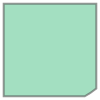

In [337]:
boxes[22].intersection(circle)

In [332]:
source_dir = '/raid2/dxb/xmm/analysis/COSMOS/sicong/0302352401/analysis'
spec = 'pnS005-obj-phs1-reg33.pi'
back = 'pnS005-back-phs1-reg33.pi'
path.exists(path.join(source_dir,back))

False

# mathpha
mathpha expr='0108060401AGNback.pi+0108060501AGNback.pi+0108060601AGNback.pi+0108060701AGNback.pi+0108061801AGNback.pi+0108061901AGNback.pi+0108062101AGNback.pi+0108062301AGNback.pi' units='c' outfil='finalback1.pi' exposure='calc' areascal='%' ncomments=0

**Special Treatment for**
* 0 : 0.0 noting!
* 9 : 0.0 noting!
* 32 : 11.0 obs
* 33 : 12.0 obs
* 56 : 11.0 obs
* 63 : 12.0 obs
* 80 : 0.0 noting!
* 90 : 0.0 noting!
* 91 : 0.0 noting!
* 99 : 0.0 noting!

refer to spectra_combine_phase1.py

## Find regions with >10 pointings

In [364]:
for i in range(100):
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}'
    x = len([n for n in os.listdir(DIR) if path.isfile(path.join(DIR, n))])/4
    if x > 10:
        print(i,':',x, 'obs')
    elif x == 0:
        print(i,':',x, 'noting!')
    else:
        print(x)

0 : 0.0 noting!
3.0
3.0
2.0
3.0
3.0
2.0
2.0
1.0
9 : 0.0 noting!
3.0
3.0
5.0
7.0
5.0
5.0
5.0
3.0
1.0
1.0
6.0
6.0
10.0
10.0
9.0
9.0
7.0
7.0
3.0
3.0
3.0
8.0
32 : 11.0 obs
33 : 12.0 obs
8.0
10.0
10.0
6.0
5.0
2.0
3.0
5.0
10.0
8.0
9.0
8.0
8.0
8.0
4.0
2.0
1.0
4.0
10.0
10.0
10.0
8.0
56 : 11.0 obs
8.0
4.0
2.0
2.0
5.0
10.0
63 : 12.0 obs
10.0
9.0
10.0
9.0
6.0
1.0
1.0
4.0
9.0
9.0
10.0
9.0
8.0
8.0
4.0
2.0
80 : 0.0 noting!
2.0
4.0
6.0
5.0
5.0
4.0
4.0
2.0
2.0
90 : 0.0 noting!
91 : 0.0 noting!
2.0
2.0
2.0
4.0
2.0
1.0
2.0
99 : 0.0 noting!


## write mathpha.sh

In [366]:
outers = [32, 33, 56, 63]
zeros = [0, 9, 80, 90, 91, 99]
regs = [i for i in range(100) if i not in outers + zeros]
for i in regs:
    DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}'
    specs = [n for n in os.listdir(DIR) if path.isfile(path.join(DIR,n)) and 'obj-os' in n]
    backs = [n for n in os.listdir(DIR) if path.isfile(path.join(DIR,n)) and 'back' in n]
    with open(path.join(DIR,'mathpha.sh'), 'at') as fout:
        print('mathpha expr="', end='', file=fout)
        for spec in specs[0:-1]:
            print("'",spec,"'", sep='', end='+', file=fout)
        print("'",specs[-1],"'", sep='', end='" ', file=fout)
        print(f"units='c' outfil='reg{i}.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)
        
        print('mathpha expr="', end='', file=fout)
        for back in backs[0:-1]:
            print("'",back,"'", sep='', end='+', file=fout)
        print("'",backs[-1],"'", sep='', end='" ', file=fout)
        print(f"units='c' outfil='reg{i}-back.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)

In [372]:
outers = [32, 33, 56, 63]
for i in outers:
        DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}'
        specs = [n for n in os.listdir(DIR) if path.isfile(path.join(DIR,n)) and 'obj-os' in n]
        backs = [n for n in os.listdir(DIR) if path.isfile(path.join(DIR,n)) and 'back' in n]
        with open(path.join(DIR,'mathpha.sh'), 'at') as fout:
            print('mathpha expr="', end='', file=fout)
            for spec in specs[0:5]:
                print("'",spec,"'", sep='', end='+', file=fout)
            print("'",specs[5],"'", sep='', end='" ', file=fout)
            print(f"units='c' outfil='reg{i}_part1.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)
        
            print('mathpha expr="', end='', file=fout)
            for spec in specs[6:-1]:
                print("'",spec,"'", sep='', end='+', file=fout)
            print("'",specs[-1],"'", sep='', end='" ', file=fout)
            print(f"units='c' outfil='reg{i}_part2.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)
        
        
            print('mathpha expr="', end='', file=fout)
            for back in backs[0:5]:
                print("'",back,"'", sep='', end='+', file=fout)
            print("'",backs[5],"'", sep='', end='" ', file=fout)
            print(f"units='c' outfil='reg{i}-back_part1.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)

            print('mathpha expr="', end='', file=fout)
            for back in backs[6:-1]:
                print("'",back,"'", sep='', end='+', file=fout)
            print("'",backs[-1],"'", sep='', end='" ', file=fout)
            print(f"units='c' outfil='reg{i}-back_part2.pi' exposure='calc' areascal='%' ncomments=0 properr=yes", file=fout)

In [373]:
for i in outers:
        DIR = f'/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/{i}'
        with open(path.join(DIR,'mathpha.sh'), 'at') as fout:
            print(f"""mathpha expr="'reg{i}_part1.pi' + 'reg{i}_part2.pi'" units='c' outfil='reg{i}.pi' exposure='calc' areascal='%' ncomments=0 properr=yes""", file=fout)
            print(f"""mathpha expr="'reg{i}-back_part1.pi' + 'reg{i}-back_part2.pi'" units='c' outfil='reg{i}-back.pi' exposure='calc' areascal='%' ncomments=0 properr=yes""", file=fout)

# addarf and addrmf
## use sum of pixel values as weight
refer to spectra_combine_phase1.py

# read fitting parameters for combined spectra fitting

In [48]:
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/'
#DIR = "D:\OneDrive - University of Miami\work\COSMOS\libra"
result_f = 'result_fixed_t.txt'

In [49]:
reg_area = (10/60)**2/3282.8
ems = [float(line.split()[4])/(2451*reg_area) for line in open(path.join(DIR,result_f)) if '9    3' in line]

temps = [float(line.split()[5]) for line in open(path.join(DIR,result_f)) if '6    3' in line]
pl_indexes = [float(line.split()[4]) for line in open(path.join(DIR,result_f)) if '10    4' in line]

pl_norms = [float(line.split()[4])*10e5 for line in open(path.join(DIR,result_f)) if '11    4' in line]

In [37]:
len(ems)

64

In [50]:
#temp_arr = np.zeros(100)
# for i in range(100):
#     if i in regs:
#         temp_arr[i] = temps[regs.index(i)]
# print(temp_arr)  
temp_arr = np.array(temps)
ems_arr = np.array(ems)

pl_indexes_arr = np.array(pl_indexes)

pl_norms_arr = np.array(pl_norms)

In [51]:
print('average:',np.average(ems_arr))
print('std:',np.std(ems_arr))

average: 0.003096931163876989
std: 0.001085429927722571


# Histogram for combined spectral fitting

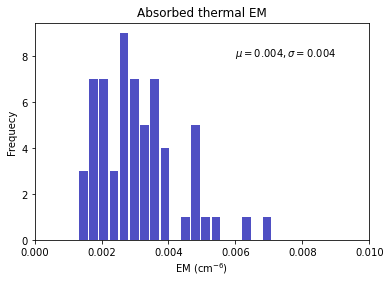

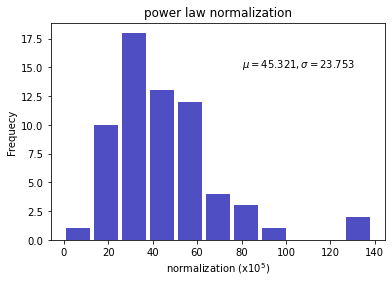

In [45]:
#temperature
# n, bins, patches = plt.hist(x=temp_arr, bins='auto', color='#0504aa',
#                             alpha=0.7, rwidth=0.85)
# plt.xlabel('temperature (keV)')
# plt.ylabel('Frequecy')
# plt.title('Absorbed thermal temperature')
# plt.text(0.1,15,f'$\mu={{{np.average(temp_arr):.3f}}}, \sigma={{{np.std(temp_arr):.3f}}}$')
# _=plt.show()

#ems
n, bins, patches = plt.hist(x=ems_arr, bins=100, color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('EM (cm$^{-6}$)')
plt.ylabel('Frequecy')
plt.xlim(0,0.01)
plt.title('Absorbed thermal EM')
plt.text(0.006,8,f'$\mu={{{np.average(ems_arr):.3f}}}, \sigma={{{np.std(ems_arr):.3f}}}$')
_=plt.show()

#power law index
# n, bins, patches = plt.hist(x=pl_indexes_arr, bins='auto', color='#0504aa',
#                             alpha=0.7, rwidth=0.85)
# plt.xlabel('photon index')
# plt.ylabel('Frequecy')
# plt.title('power law index')
# plt.text(3.5,15,f'$\mu={{{np.average(pl_indexes_arr):.3f}}}, \sigma={{{np.std(pl_indexes_arr):.3f}}}$')
# _=plt.show()

#power law normalization
n, bins, patches = plt.hist(x=pl_norms_arr, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.xlabel('normalization (x10$^5$)')
plt.ylabel('Frequecy')
plt.title('power law normalization')
plt.text(80,15,f'$\mu={{{np.average(pl_norms_arr):.3f}}}, \sigma={{{np.std(pl_norms_arr):.3f}}}$')
_=plt.show()

## identify outliers

In [40]:
# identify outliers
print('ems:')
for em in ems:
    if em>200:
        print(f'reg{regs[ems.index(em)]}:',em)
print('powerlaw index:')
for i in pl_indexes:
    if i>3.5:
        print(f'reg{regs[pl_indexes.index(i)]}:',i)


ems:
reg41: 658.928
reg51: 230.506
powerlaw index:
reg38: 5.03475


In [ ]:
ems_clean = [float(line.split()[4])*10e5 for line in open(path.join(DIR,result_f)) 
             if '9    3' in line if float(line.split()[4])*10e5<200]
pl_indexes_clean = [float(line.split()[4]) for line in open(path.join(DIR,result_f)) 
                    if '10    4' in line if float(line.split()[4])<5]

ems_clean_arr = np.array(ems_clean)
pl_indexes_clean_arr = np.array(pl_indexes_clean)

## normalize to standard units

In [52]:
#temp_arr_sd = standardize(temp_arr)
ems_clean_arr_sd = standardize(ems_arr)
#pl_indexes_clean_arr_sd = standardize(pl_indexes_clean_arr)
pl_norms_arr_sd = standardize(pl_norms_arr)

In [33]:
#print(pl_norms_arr_sd)

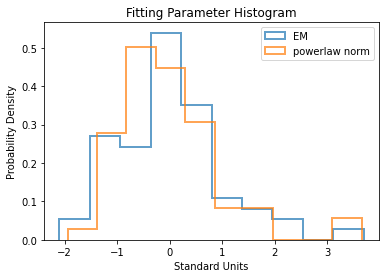

In [53]:
#plt.hist(x=temp_arr_sd, bins='auto', alpha=0.7, lw=2, label='temperature',histtype='step',density=True)
plt.hist(x=ems_clean_arr_sd, bins='auto', alpha=0.7, lw=2, label='EM',histtype='step',density=True)
#plt.hist(x=pl_indexes_clean_arr_sd, bins='auto', alpha=0.7, lw=2, label='powerlaw index',histtype='step',density=True)
plt.hist(x=pl_norms_arr_sd, bins='auto', alpha=0.7, lw=2, label='powerlaw norm',histtype='step',density=True)
plt.legend()
#plt.figure(figsize=(24,24))
plt.xlabel('Standard Units')
plt.ylabel('Probability Density')
plt.title('Fitting Parameter Histogram')
_=plt.show()

# write the fitting results from xspec logs

In [36]:
with open(path.join(DIR,'xspec_cstat.log')) as f:
    lines = f.readlines()
with open(path.join(DIR,'result_cstat.txt'),'at') as fout:
    for i in range(len(lines)):
            if 'Spectral Data File' in lines[i]:
                print(lines[i],end='',file=fout)
            if 'Covariance Matrix' in lines[i]:
                print(*lines[i+10:i+21],end='',file=fout)
                print(lines[i+27],end='',file=fout)

In [40]:
%head -n 10 DIR+'result_cstat.txt' 

UsageError: Line magic function `%head` not found.


# Heatmap

## get values and texts for heatmap

In [38]:
values, texts = heatmap_values(regs=regs,z=ems)

In [39]:
texts

array([['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'],
       ['10', '11', '12', '13', '14', '15', '16', '17', '18', '19'],
       ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29'],
       ['30', '31', '32', '33', '34', '35', '36', '37', '38', '39'],
       ['40', '41', '42', '43', '44', '45', '46', '47', '48', '49'],
       ['50', '51', '52', '53', '54', '55', '56', '57', '58', '59'],
       ['60', '61', '62', '63', '64', '65', '66', '67', '68', '69'],
       ['70', '71', '72', '73', '74', '75', '76', '77', '78', '79'],
       ['80', '81', '82', '83', '84', '85', '86', '87', '88', '89'],
       ['90', '91', '92', '93', '94', '95', '96', '97', '98', '99']],
      dtype=object)

## get ra,dec for each region

In [40]:
region_file = '/raid2/dxb/xmm/analysis/COSMOS/sicong/region/phase1/region_radec_phs1.reg'
ras = list(set([format(float(line.split()[0]), '.2f') for line in open(region_file)]))
ras.sort()
decs = list(set([format(float(line.split()[1]), '.2f') for line in open(region_file)]))
decs.sort()

In [87]:
ras

['149.37',
 '149.53',
 '149.70',
 '149.87',
 '150.03',
 '150.20',
 '150.37',
 '150.53',
 '150.70',
 '150.87']

In [53]:
decs

['1.46820833',
 '1.6348749966666667',
 '1.8015416633333332',
 '1.96820833',
 '2.1348749966666665',
 '2.3015416633333334',
 '2.46820833',
 '2.6348749966666665',
 '2.8015416633333334',
 '2.96820833']

## plot the heatmap

In [44]:
heatmap_plot(values=values,ras=ras,decs=decs,zmin=0,zmax=0.01,
             title='Absorbed Thermal Component Emission Measure',
             xaxis='RA',yaxis='DEC')

## plot annotated heatmap

In [663]:
values, texts = heatmap_values(regs=regs,z=new_chi)
annotated_heatmap(values=values,texts=texts,ras=ras,decs=decs,
                  title='Reduced Chi Square',xaxis='RA',yaxis='DEC')

# Check spectral counts

In [59]:
%run -t em_heatmap_phase1.py


IPython CPU timings (estimated):
  User   :       0.04 s.
  System :       0.02 s.
Wall time:       1.83 s.


In [58]:
print('Spectral data counts:')
for line in open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/rate.log'):
    if 'Spectral data counts' in line:
        print(line.split(':')[1].strip())

Spectral data counts:
482
277
377
713
301
636
2581
1993
251
2659
3879
3455
4793
4453
3482
4934
4283
1659
1031
5212
7446
5794
6638
6998
5044
11244
10674
1911
1214
5660
6540
6393
6198
6787
7763
10333
6845
1759
479
4462
7037
5111
5975
6041
5535
7010
4897
457
327
4538
6938
5184
6490
6763
5886
5692
2963
277
1397
4862
6231
5232
4260
3664
4877
6733
4194
378
482
4204
6194
5325
6332
6080
4631
6596
4811
1182
2777
4646
4283
4885
4805
2219
3978
3074
302
377
252
1376
2035
791
76
327


In [106]:
counts = []
for line in open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/rate.log'):
    if 'Spectral data counts' in line:
        counts.append(int(line.split(':')[1].strip()))
counts.remove(76)
print(counts)

[482, 277, 377, 713, 301, 636, 2581, 1993, 251, 2659, 3879, 3455, 4793, 4453, 3482, 4934, 4283, 1659, 1031, 5212, 7446, 5794, 6638, 6998, 5044, 11244, 10674, 1911, 1214, 5660, 6540, 6393, 6198, 6787, 7763, 10333, 6845, 1759, 479, 4462, 7037, 5111, 5975, 6041, 5535, 7010, 4897, 457, 327, 4538, 6938, 5184, 6490, 6763, 5886, 5692, 2963, 277, 1397, 4862, 6231, 5232, 4260, 3664, 4877, 6733, 4194, 378, 482, 4204, 6194, 5325, 6332, 6080, 4631, 6596, 4811, 1182, 2777, 4646, 4283, 4885, 4805, 2219, 3978, 3074, 302, 377, 252, 1376, 2035, 791, 327]


# read reduced chi square for combined spectral fitting

In [2]:
f='/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/result.txt'
f_fixed_t='/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/result_fixed_t.txt'
f_fixed_par='/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/result_fixed_par.txt'
# for line in open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/result_fixed_par.txt'):
#     if 'Reduced' in line:
#         print(line.split('=')[1].strip())
rchi=[float(line.split('=')[1].strip().split()[0]) for line in open(f) if 'Reduced' in line]
rchi_fixed_t=[float(line.split('=')[1].strip().split()[0]) for line in open(f_fixed_t) if 'Reduced' in line]
rchi_fixed_par=[float(line.split('=')[1].strip().split()[0]) for line in open(f_fixed_par) if 'Reduced' in line]
for i in range(len(rchi)):
    print(rchi[i],rchi_fixed_t[i],rchi_fixed_par[i])

0.59711 0.59528 0.59776
0.63064 0.63133 0.63349
0.53099 0.5304 0.53225
0.63115 0.63157 0.74198
0.66372 0.6969 0.75188
0.69756 0.76064 0.83231
0.71587 0.71771 0.73981
0.68978 0.6884 0.68809
0.68731 0.69264 0.69679
0.605 0.60443 0.60399
0.59535 0.59997 0.61835
0.80474 0.81383 0.93688
0.65596 0.66056 0.73588
0.70031 0.73002 0.72669
0.6638 0.66345 0.66326
0.7058 0.70504 0.72803
0.63978 0.63943 0.63939
0.69799 0.69713 0.7746
0.56777 0.5676 0.57125
0.65003 0.65214 0.68377
0.62594 0.63316 0.68534
0.61013 0.60955 0.61184
0.61465 0.61604 0.62795
0.55411 0.55384 0.58882
0.64881 0.66653 0.67296
0.62261 0.6229 0.62275
0.61717 0.61881 0.62284
0.59929 0.59971 0.59831
0.71686 0.71729 0.72146
0.64044 0.64589 0.67924
0.57133 0.57303 0.58254
0.50195 0.50159 0.51188
0.64037 0.65239 0.65599
0.68978 0.68889 0.6883
0.67385 0.68227 0.67972
0.71225 0.71179 0.7117
0.65874 0.6608 0.66311
0.61487 0.62103 0.61871
0.59172 0.59195 0.59158
0.61466 0.61324 0.62656
0.65425 0.65471 0.68862
0.69294 0.69186 0.70576
0.599

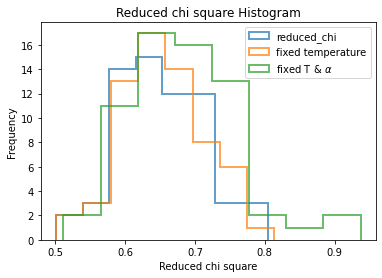

In [25]:
plt.hist(x=np.array(rchi), bins='auto', alpha=0.7, lw=2, label='reduced_chi',histtype='step',density=False)
plt.hist(x=np.array(rchi_fixed_t), bins='auto', alpha=0.7, lw=2, label='fixed temperature',histtype='step',density=False)
plt.hist(x=np.array(rchi_fixed_par), bins='auto', alpha=0.7, lw=2, label=r'fixed T & $\alpha$',histtype='step',density=False)
plt.legend()
#plt.figure(figsize=(24,24))
plt.xlabel('Reduced chi square')
plt.ylabel('Frequency')
plt.title('Reduced chi square Histogram')
_=plt.show()

In [4]:
np.std(np.array(rchi))

0.05836783916176001

# Plot spectrum and backgrounds for combined spectral fitting

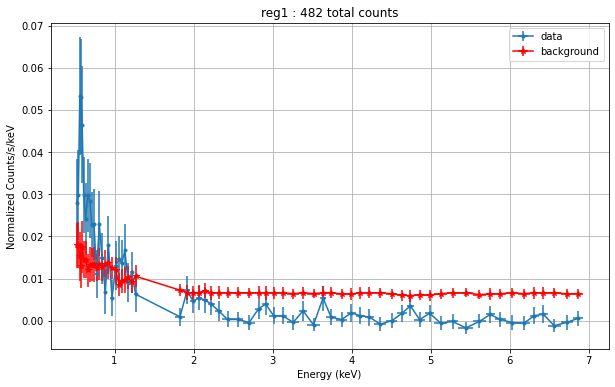

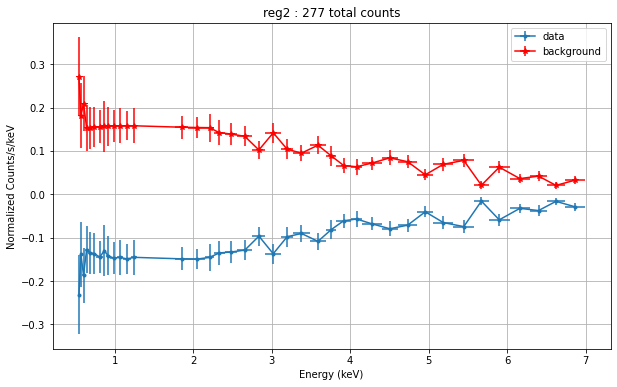

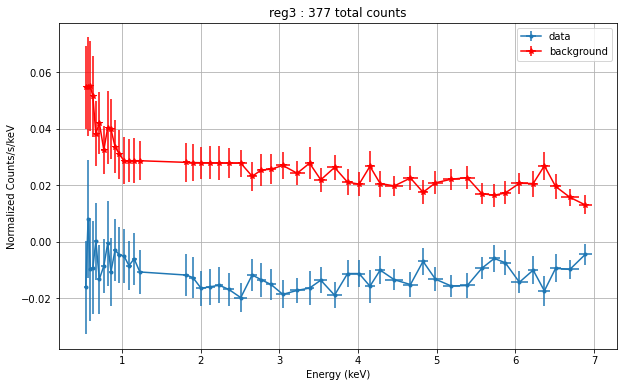

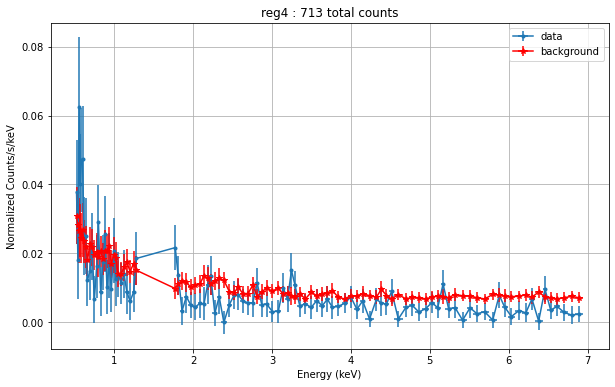

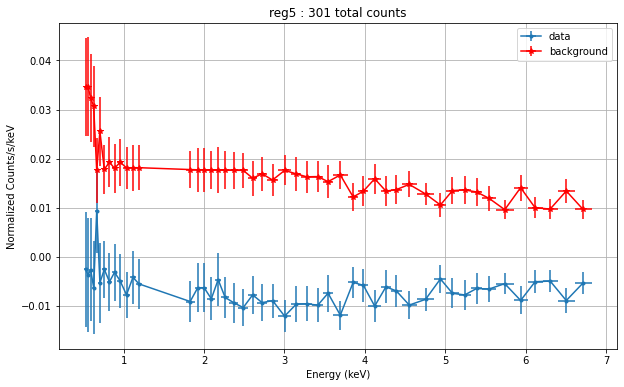

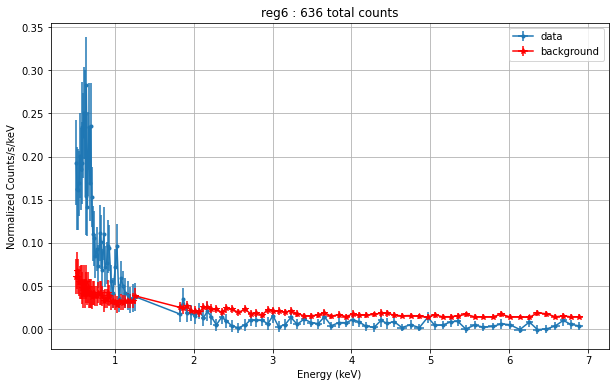

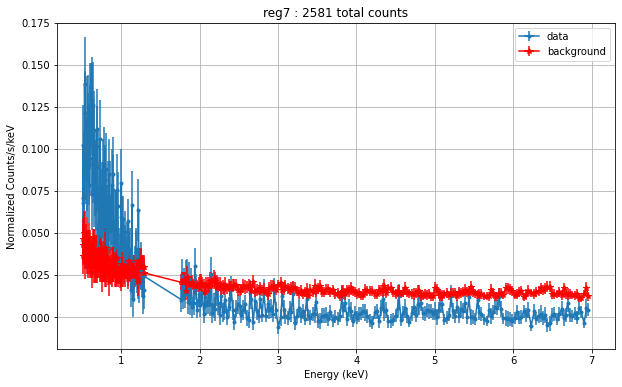

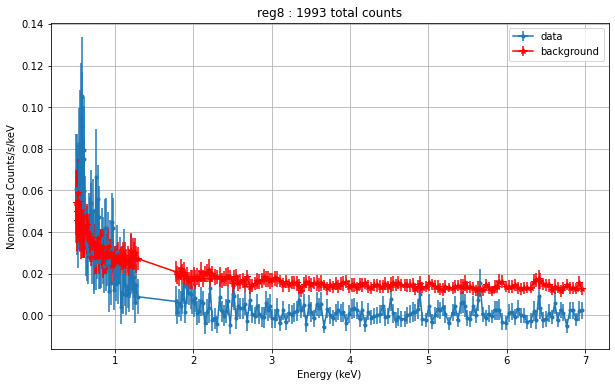

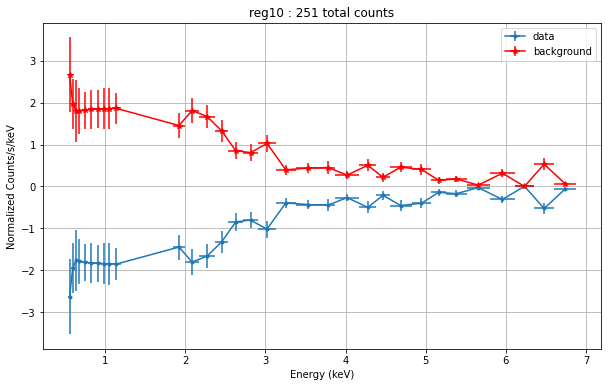

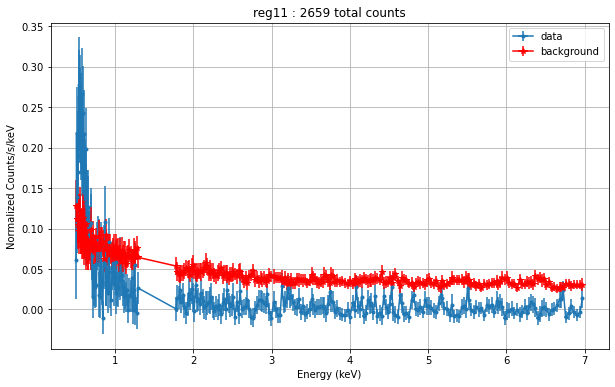

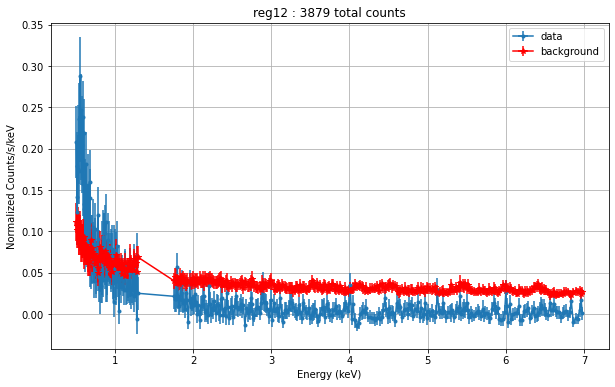

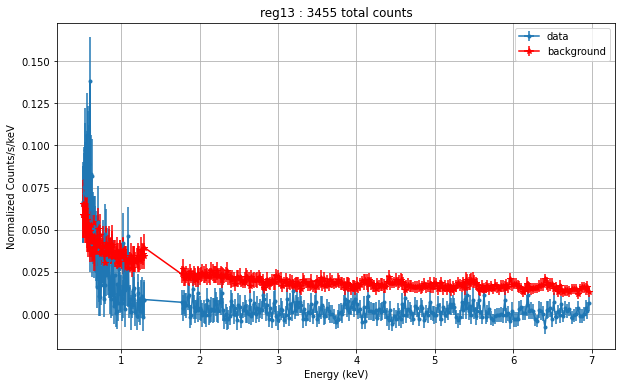

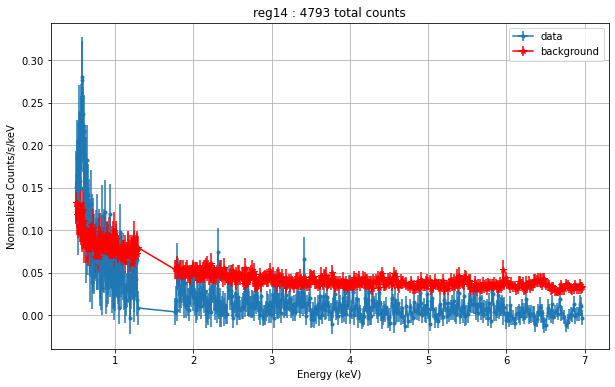

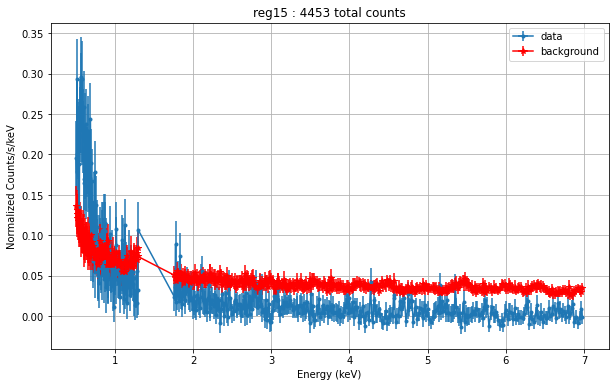

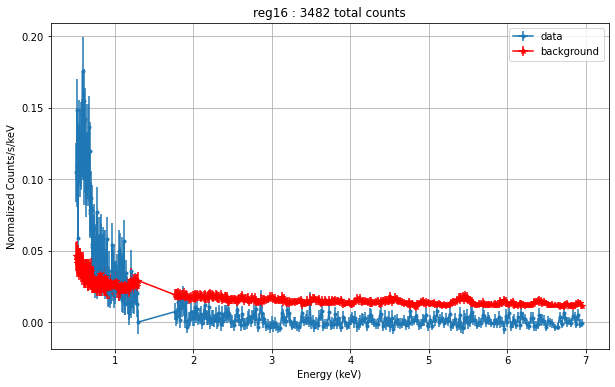

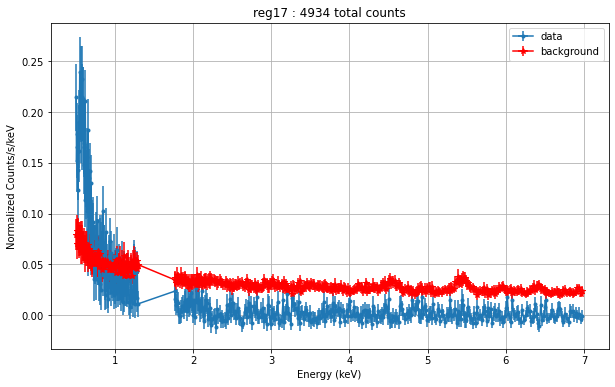

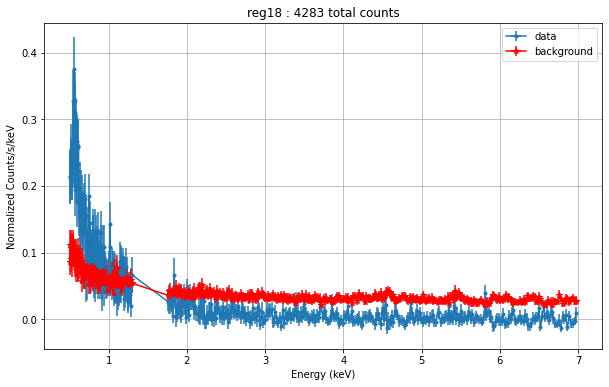

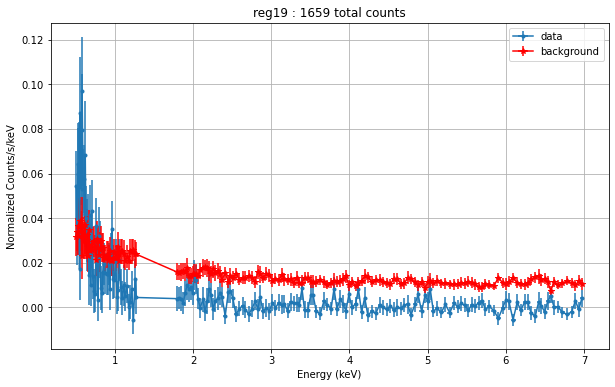

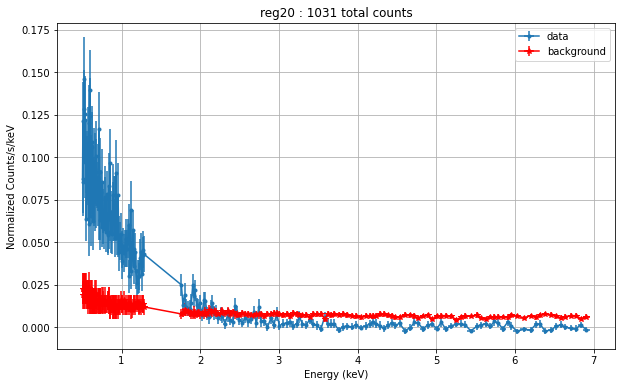

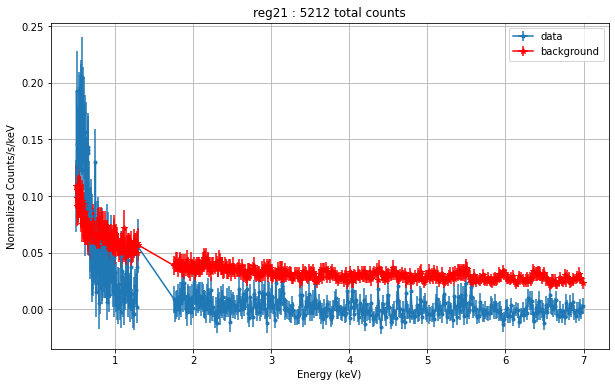

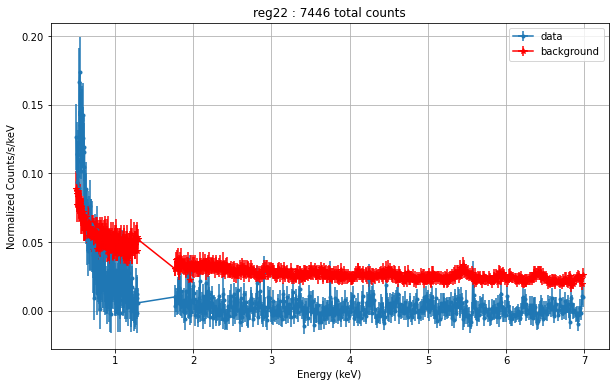

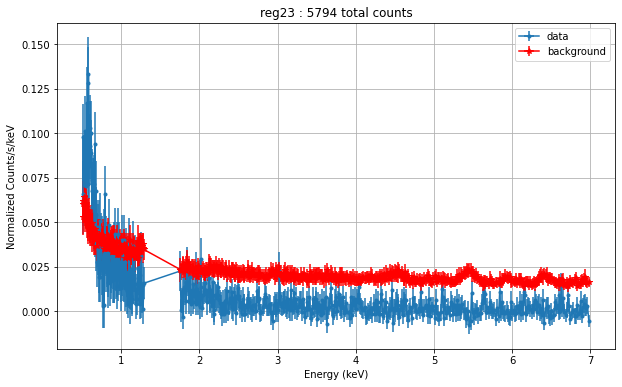

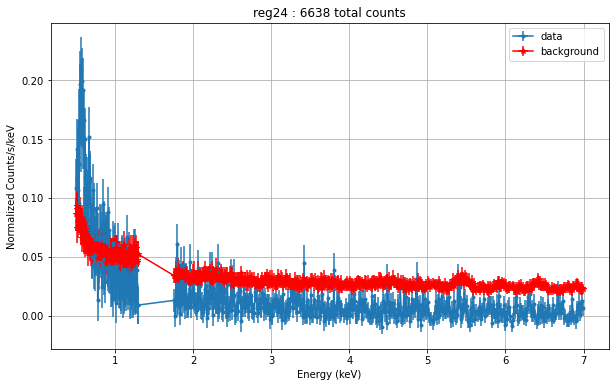

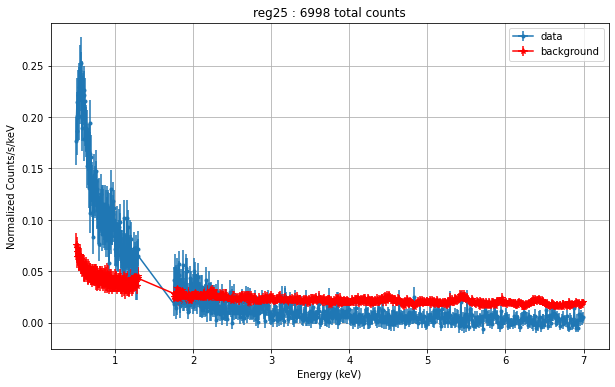

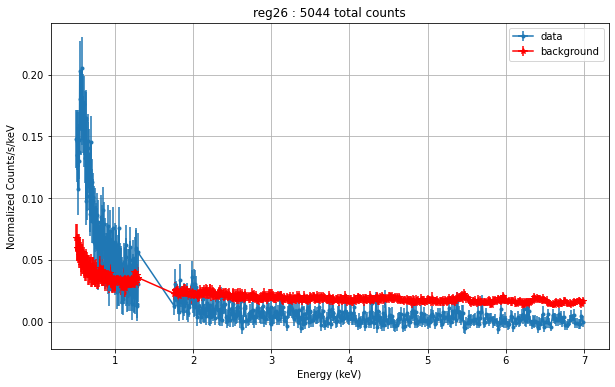

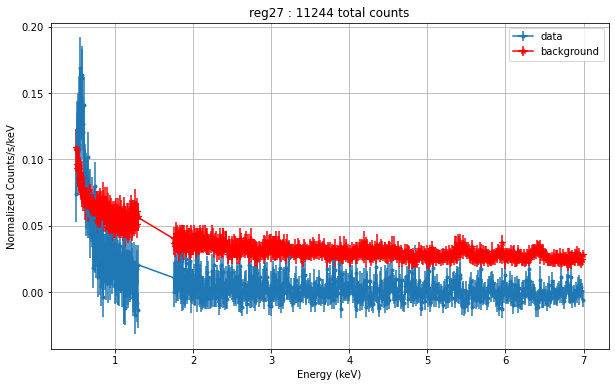

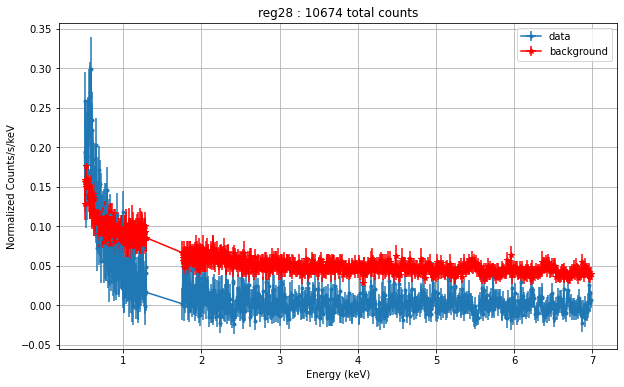

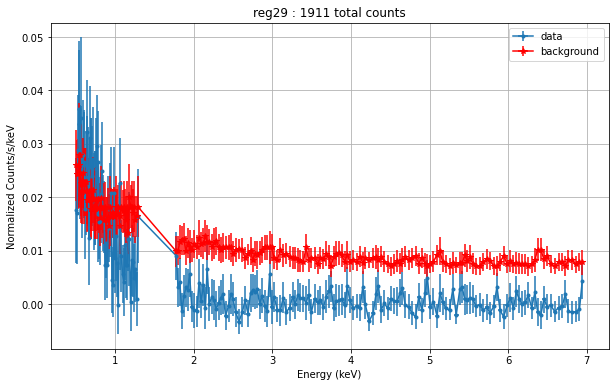

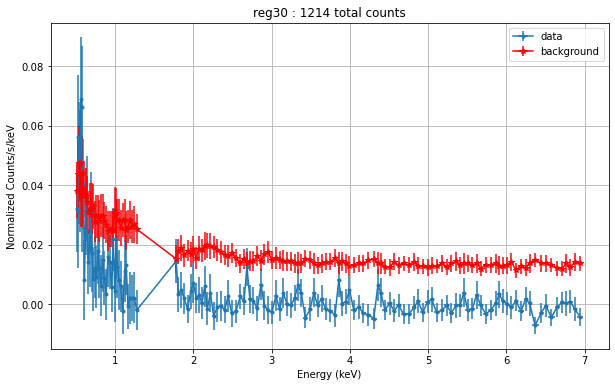

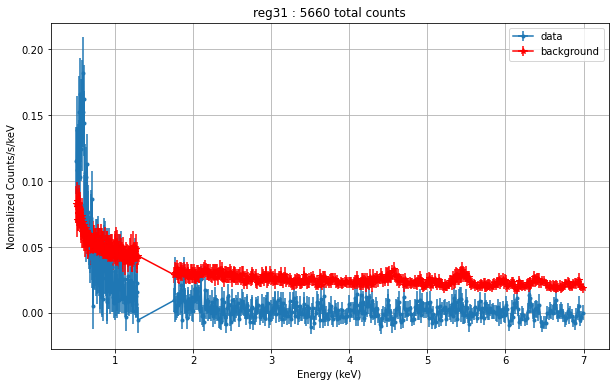

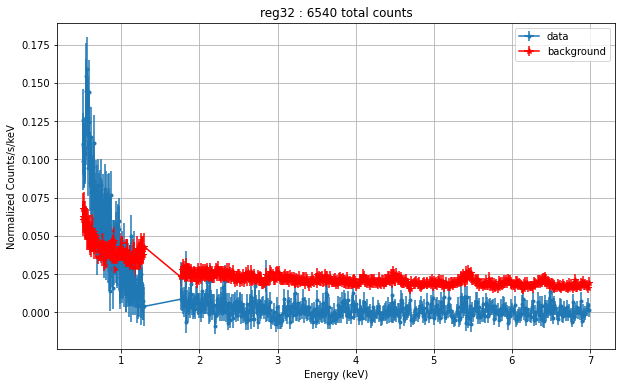

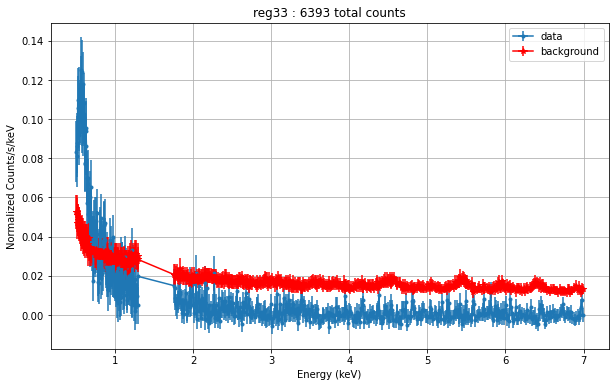

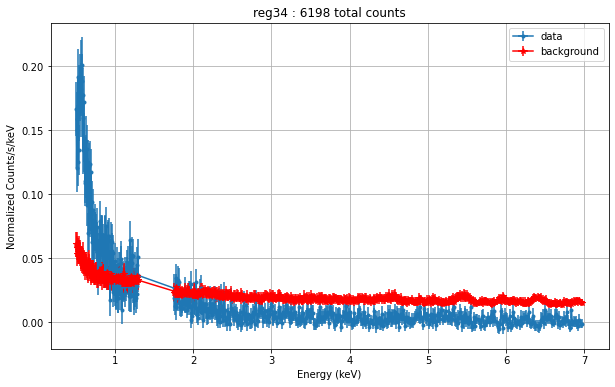

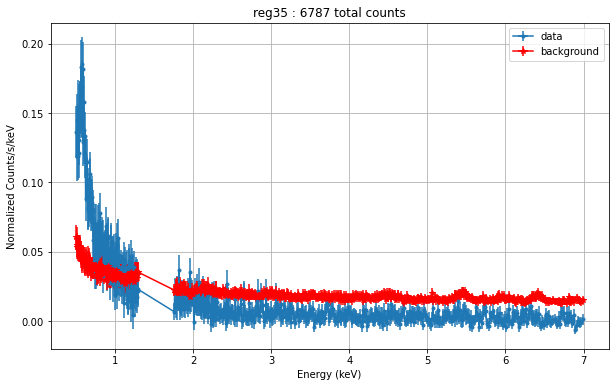

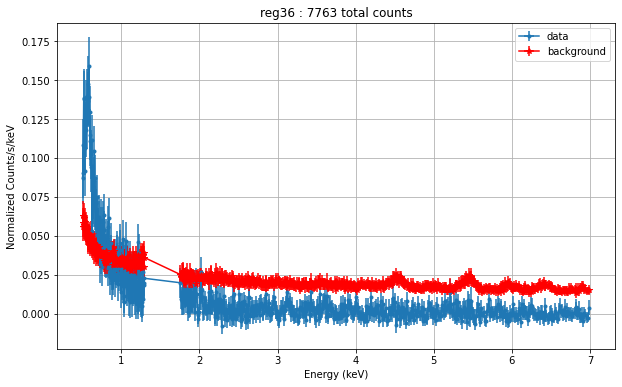

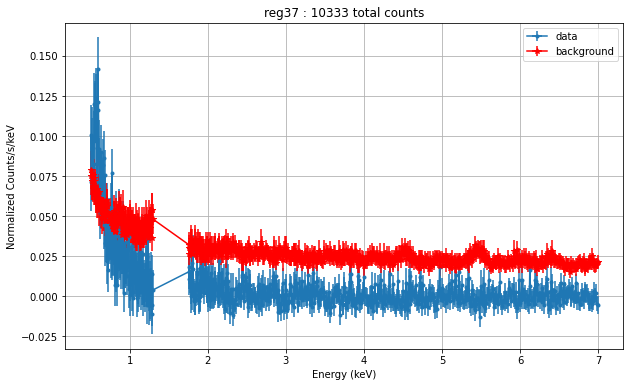

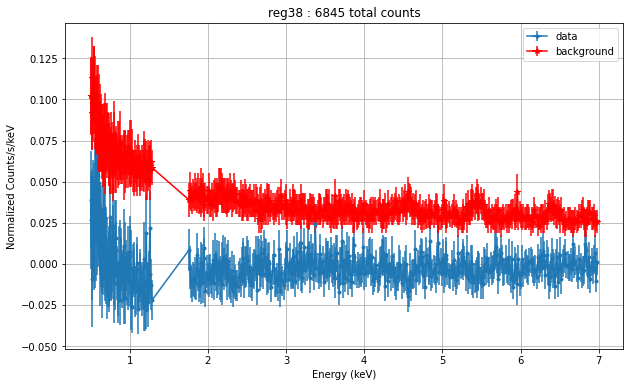

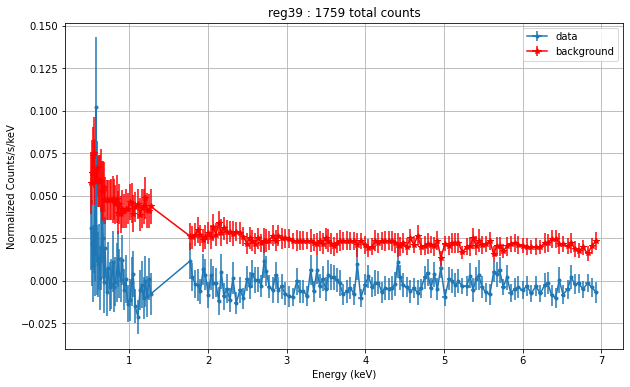

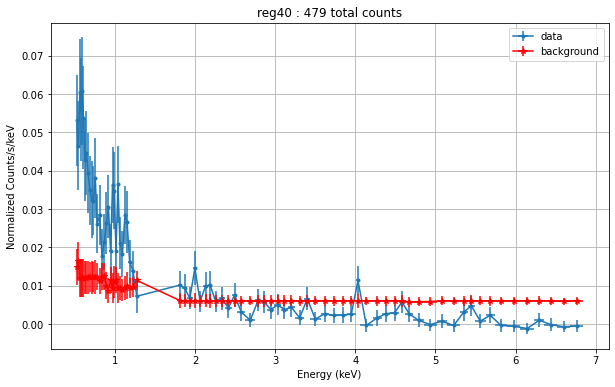

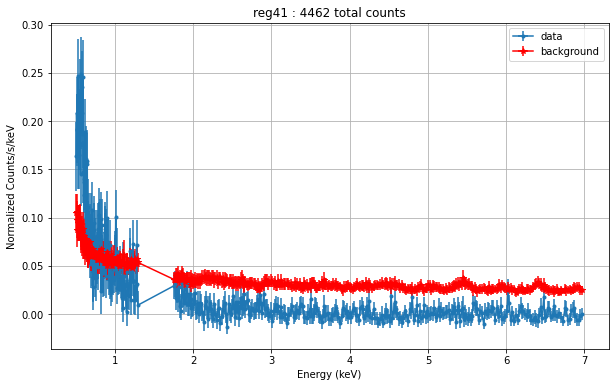

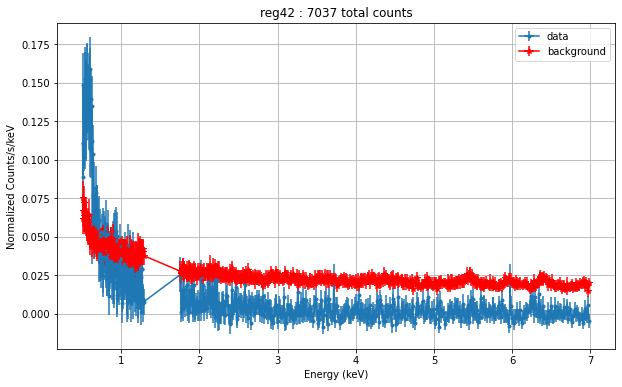

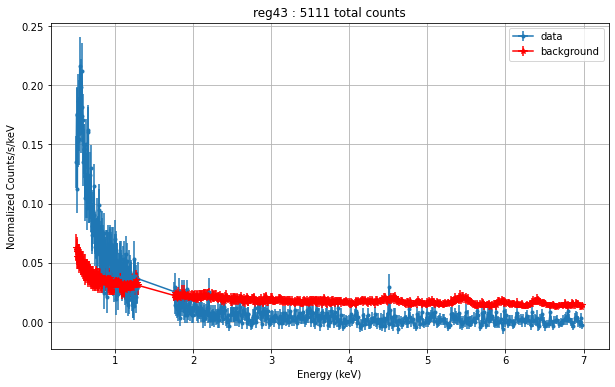

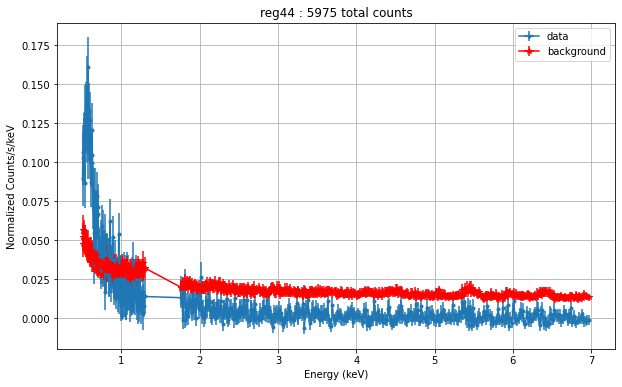

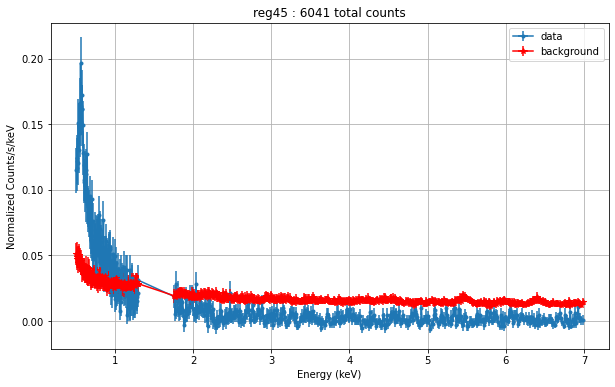

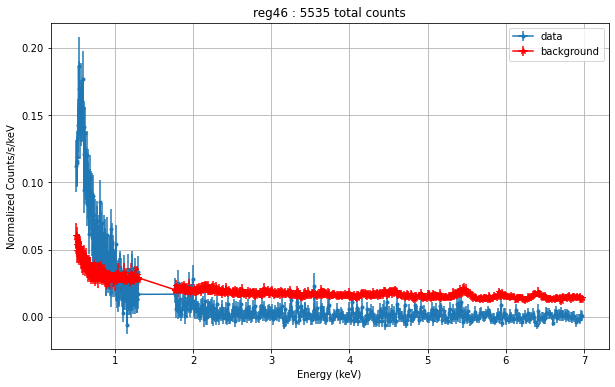

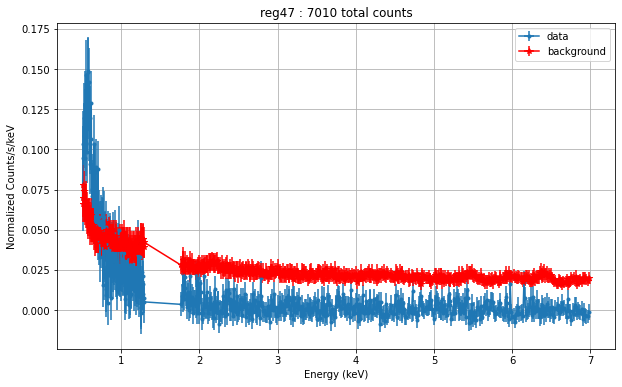

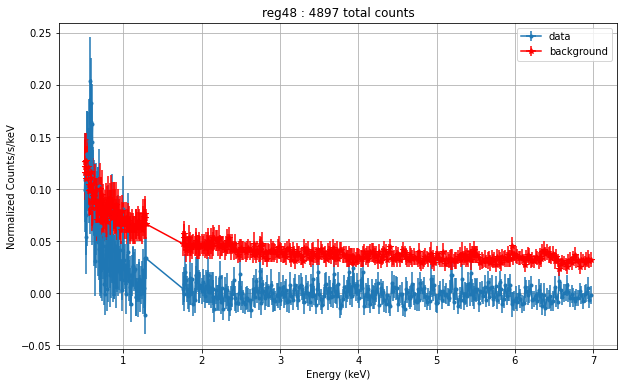

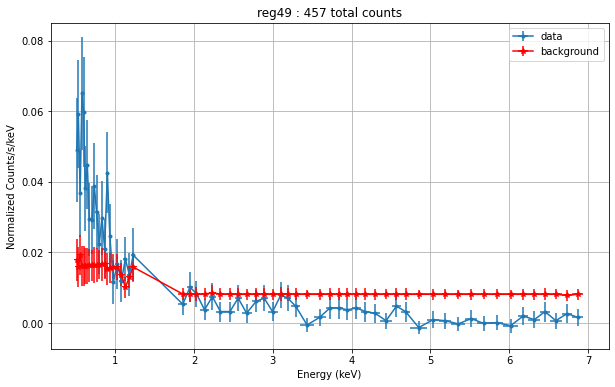

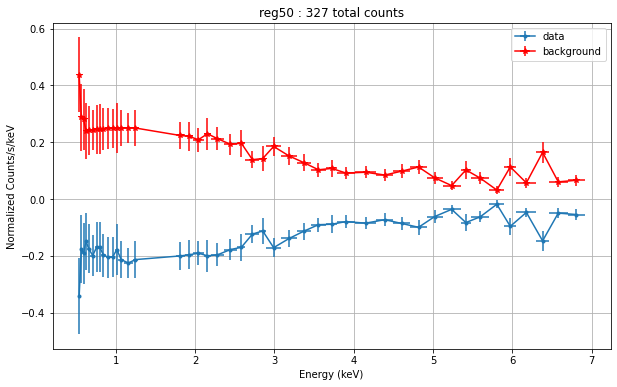

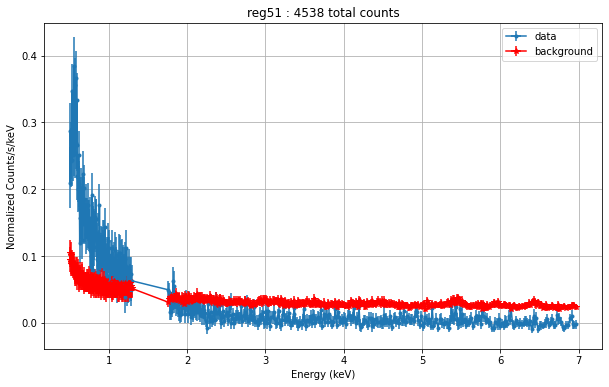

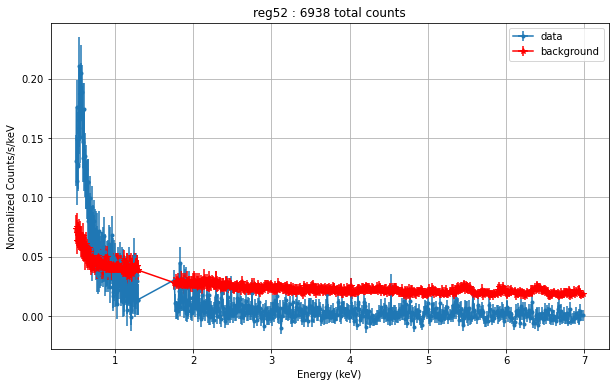

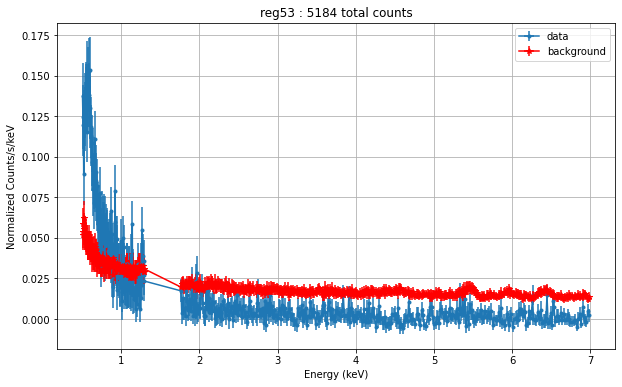

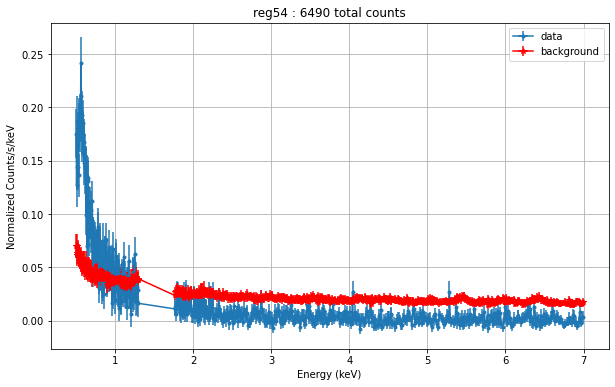

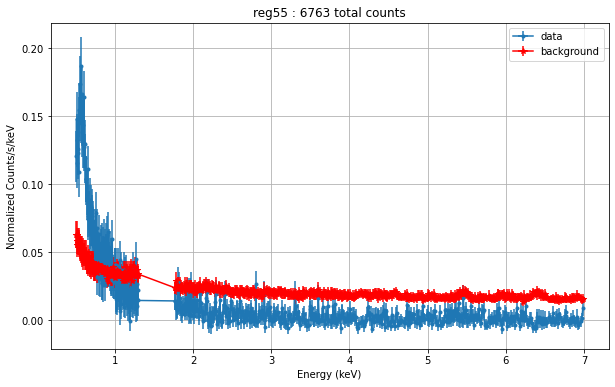

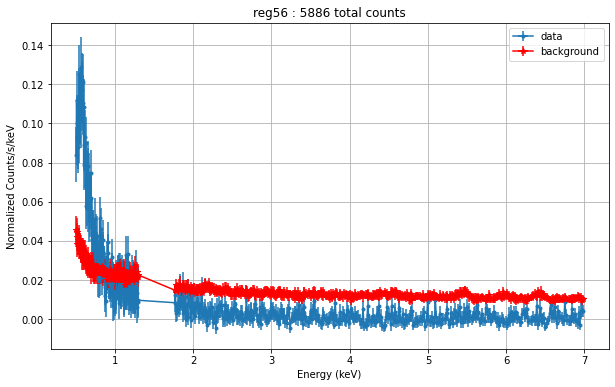

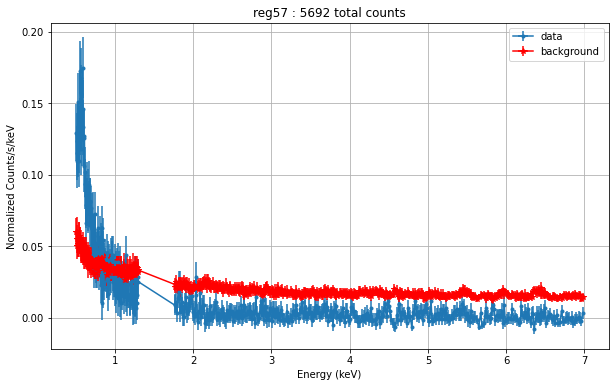

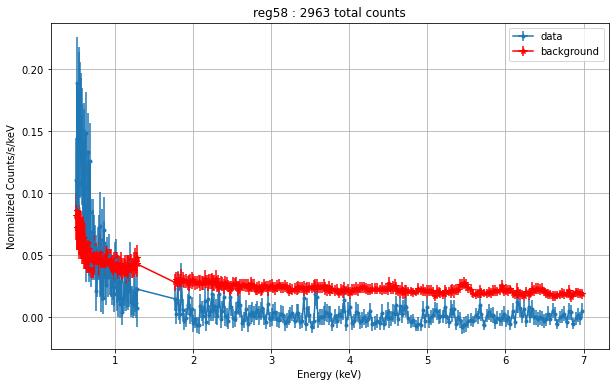

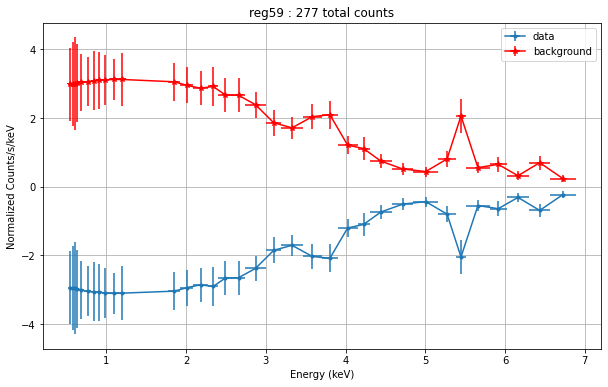

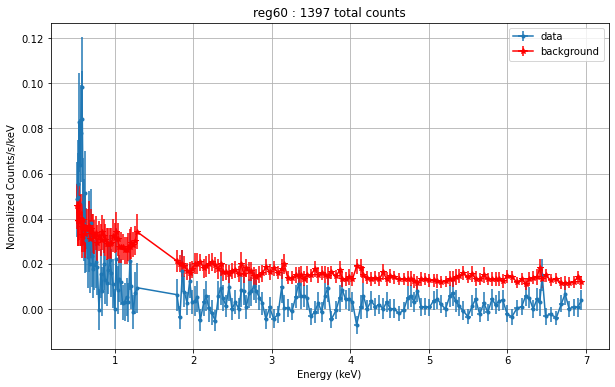

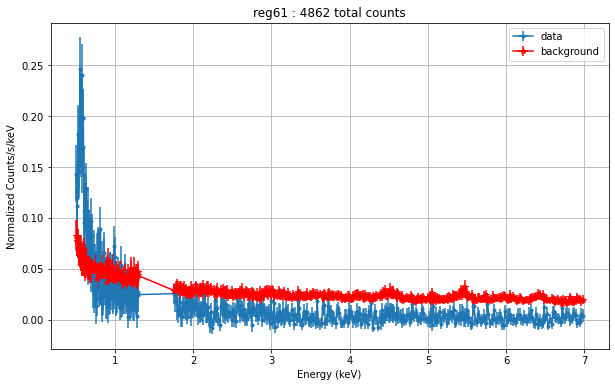

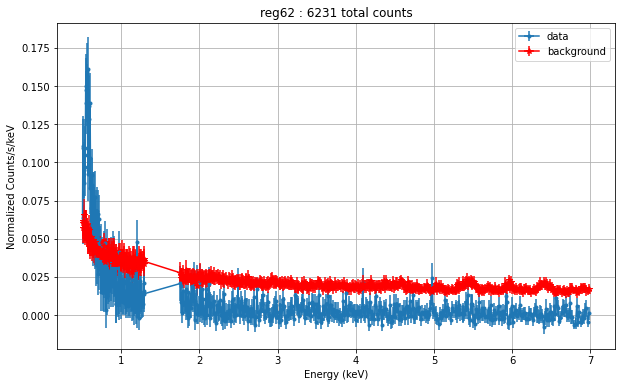

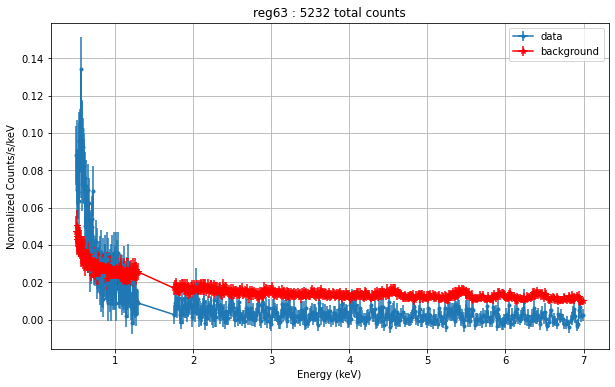

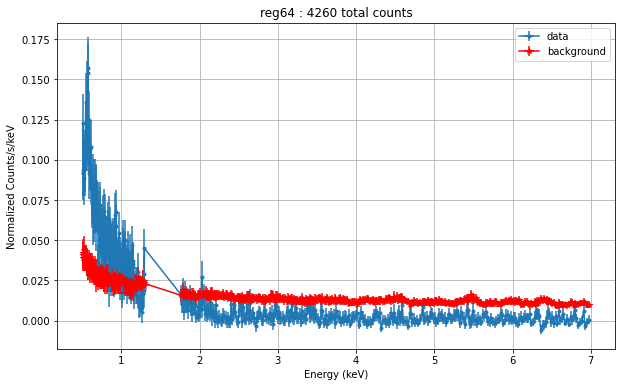

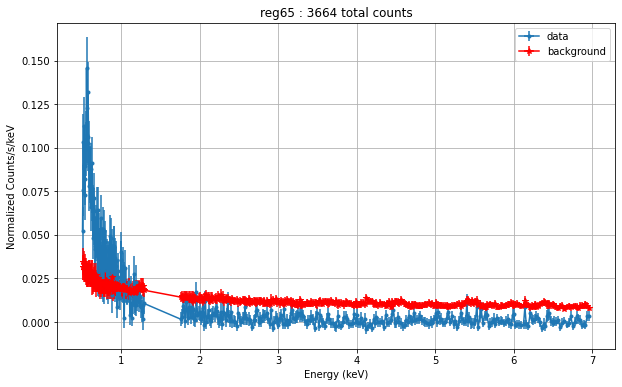

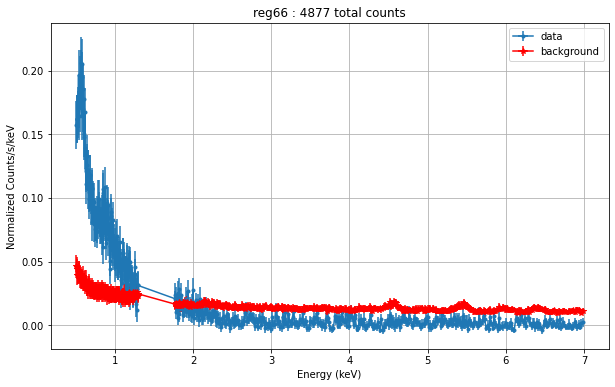

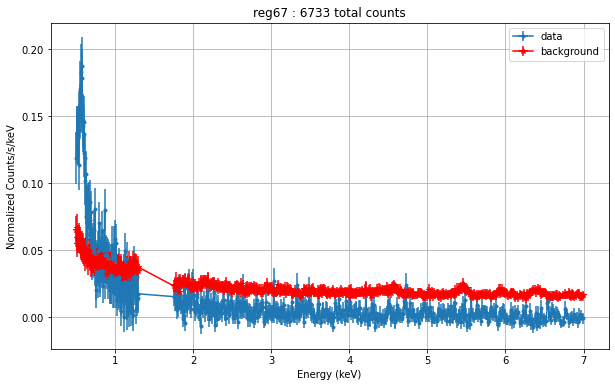

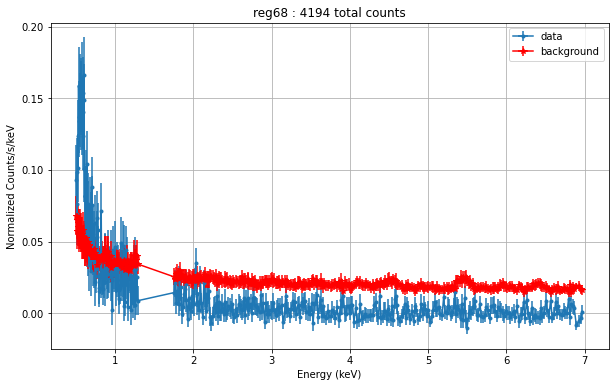

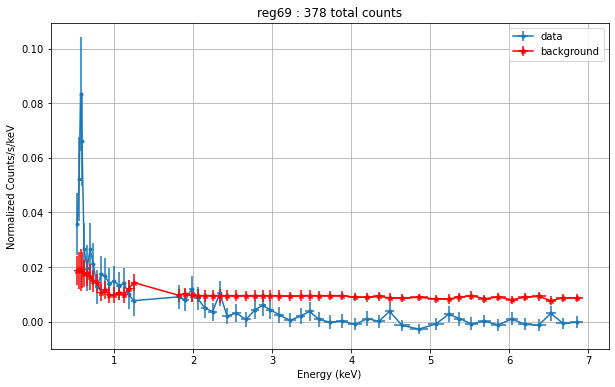

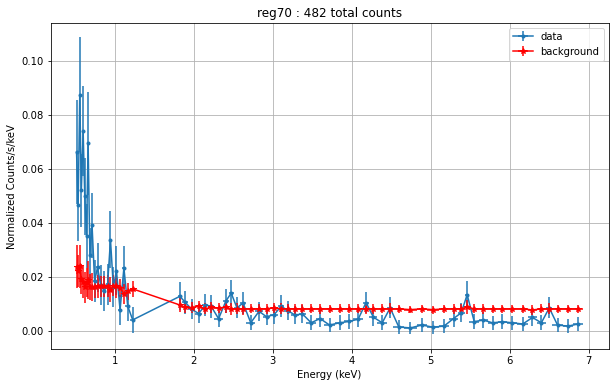

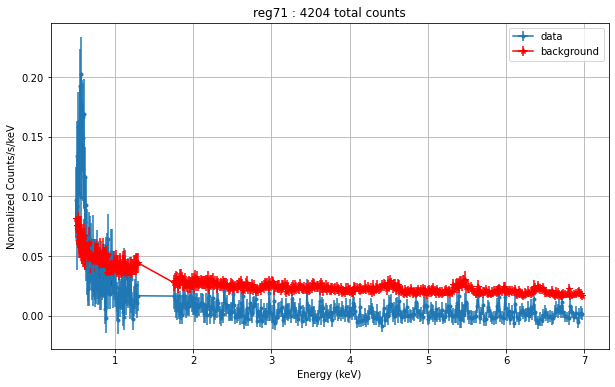

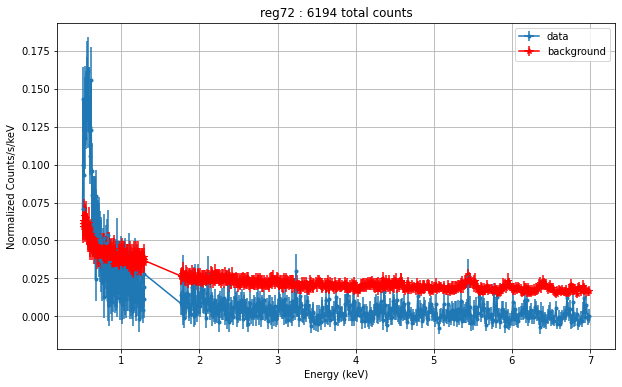

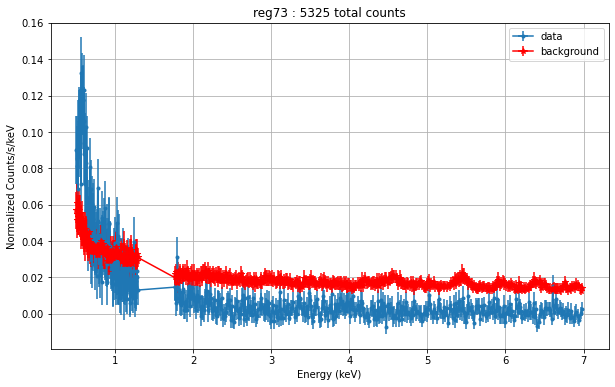

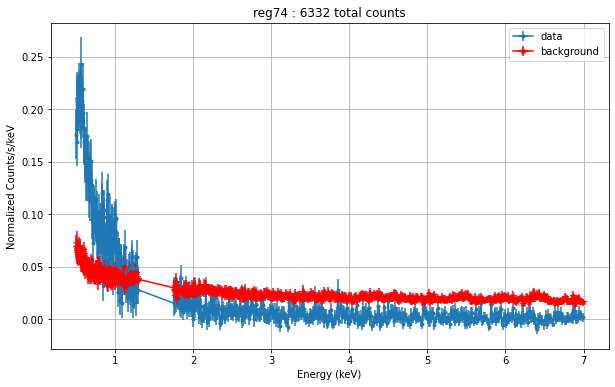

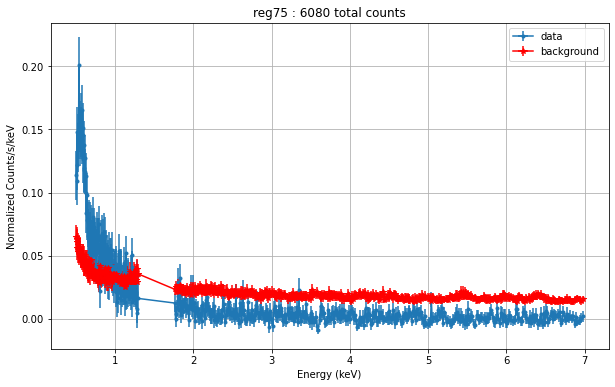

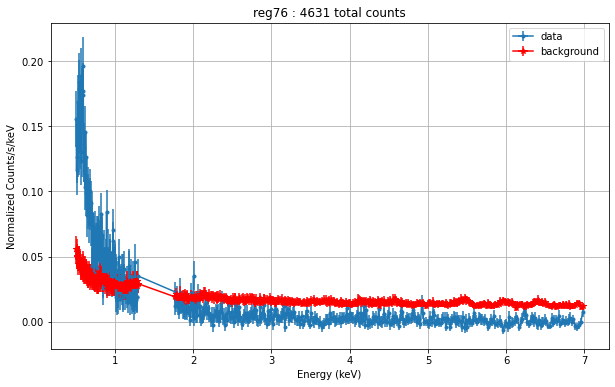

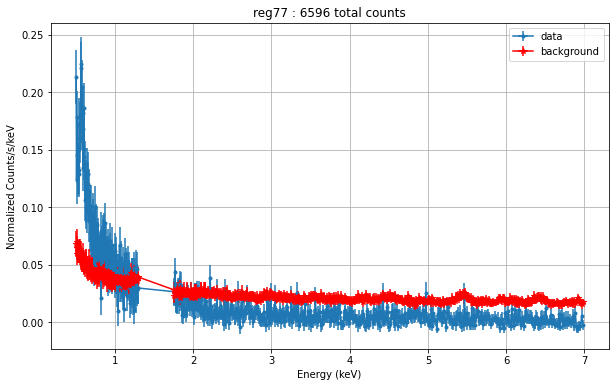

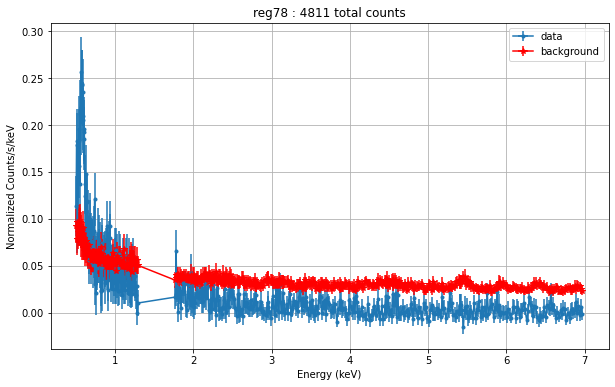

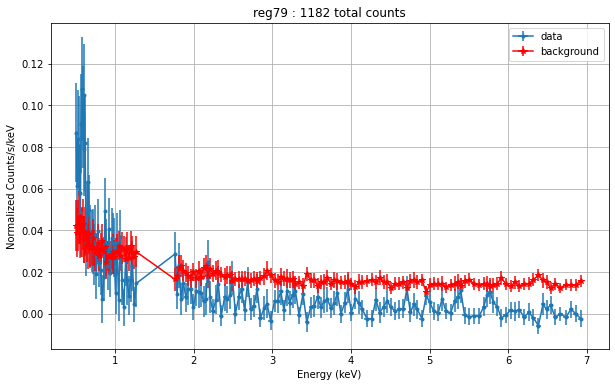

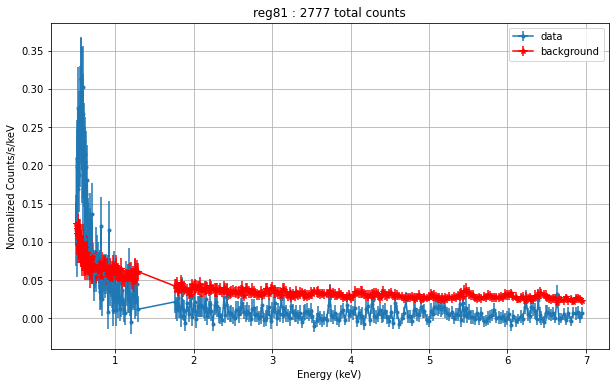

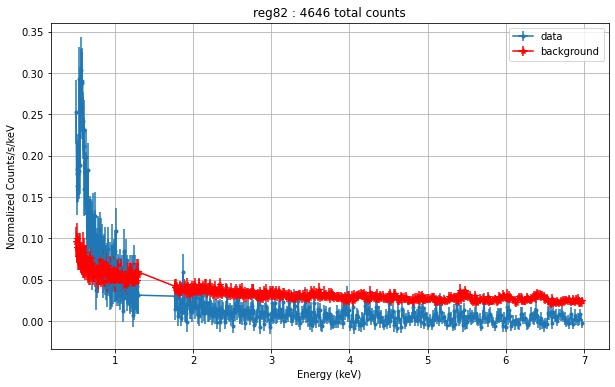

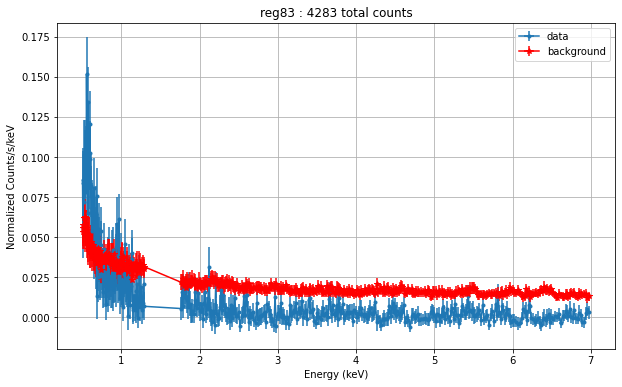

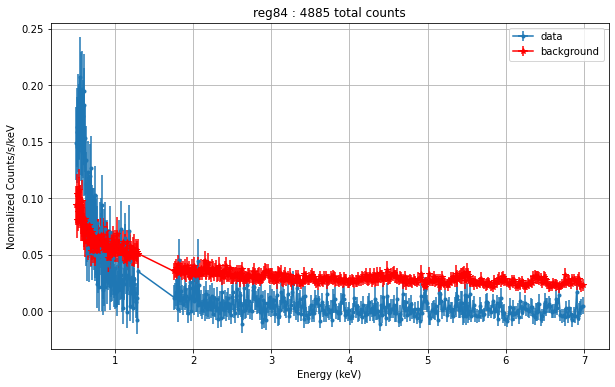

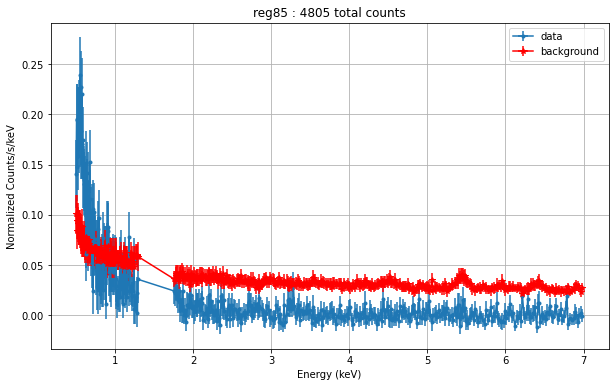

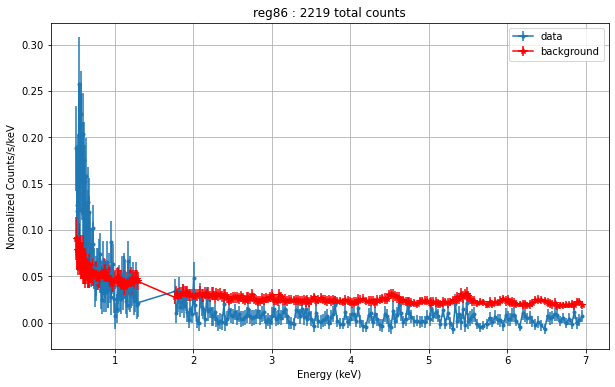

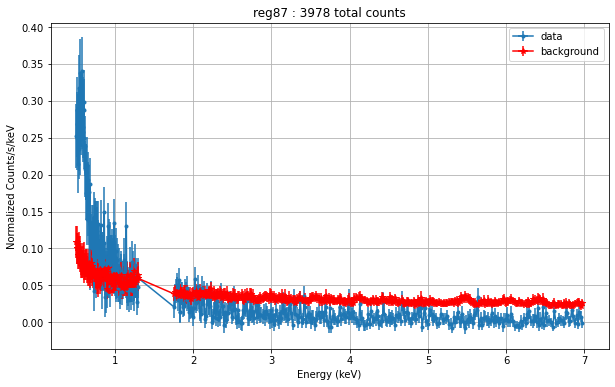

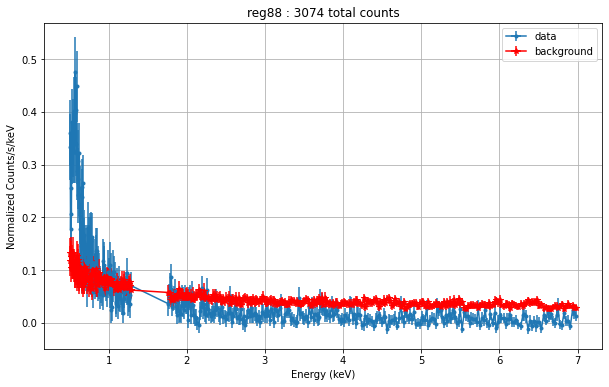

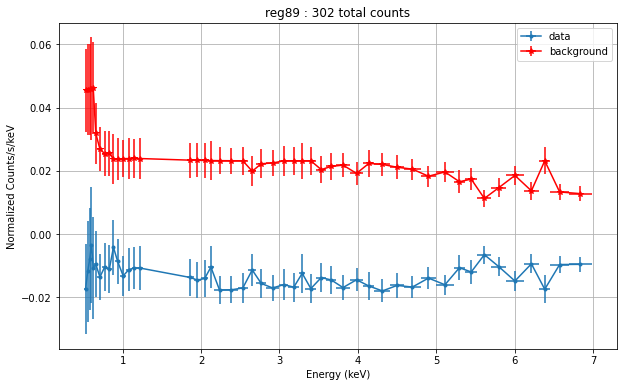

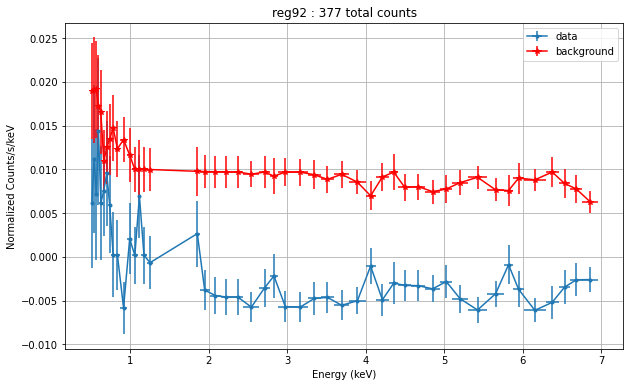

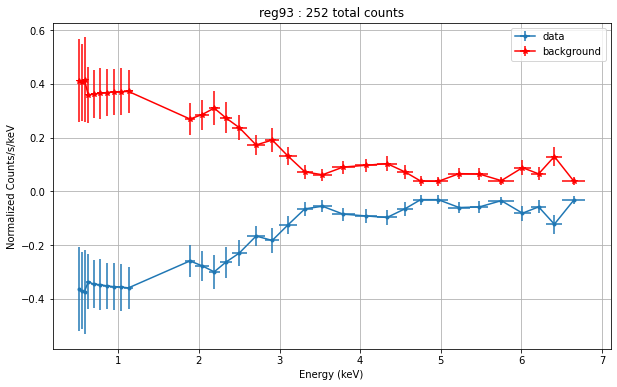

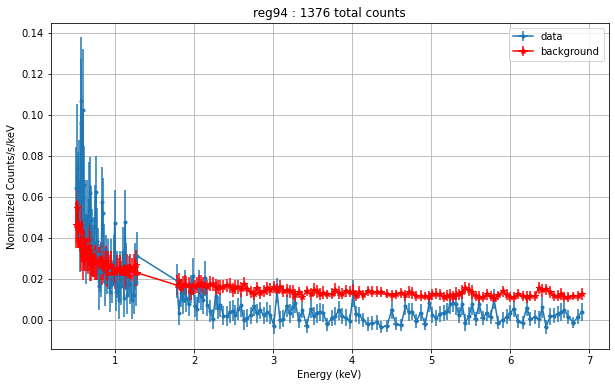

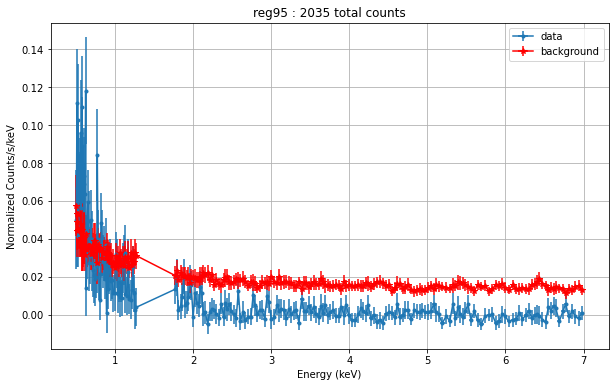

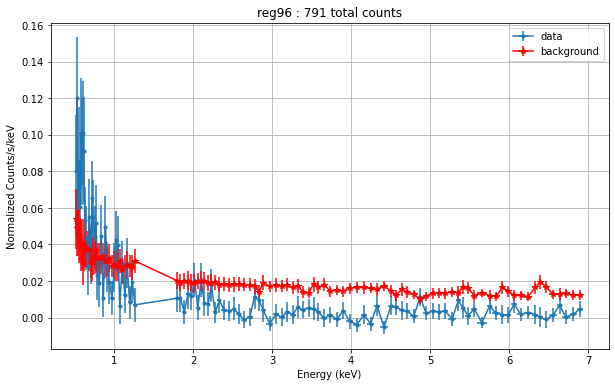

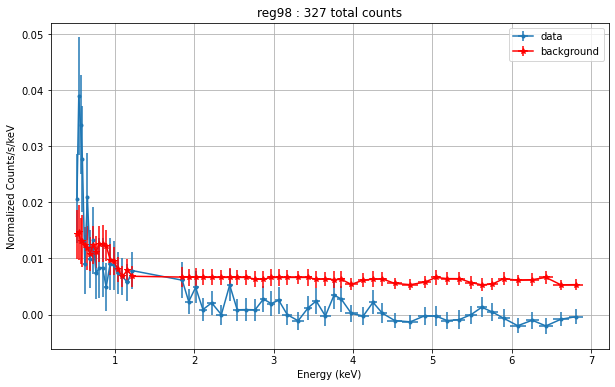

In [158]:
for i in regs:
    DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/'
    df = read_spectra(DIR=DIR,name='reg{}.qdp'.format(i),skiprows=3)
    title = 'reg{}'.format(i) + ' : ' + str(counts[regs.index(i)]) + ' total counts'
    plot_spectra(title,df)

# Plot spectrum and backgrounds for combined spectral fitting

In [ ]:
for i in [12]:
    DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/'
    df = read_fit(DIR,'reg{}_model.qdp'.format(i),skiprows=3)
    title = 'reg{}'.format(i) + ' : ' + str(counts[regs.index(i)]) + ' total counts'
    plot_model(title,df)

In [196]:
df.head(10)

x          x_err           y          y_err         res  \
0  0.50367099  2.55697966E-3  0.20788497  4.36110757E-2  0.16610387   
1  0.50878346  2.55551934E-3  0.17876264  4.16561477E-2  0.17131078   
2  0.51389199  2.55298615E-3   0.1411377  3.91545631E-2   0.1769854   
3  0.51899648  2.55149603E-3  0.12296026  3.93153317E-2   0.1829946   
4  0.52409744  2.54949927E-3  0.20968142  4.27699052E-2  0.18917802   
5  0.52919495  2.54800916E-3  0.17501512  4.15596925E-2   0.1953174   
6  0.53428853  2.54550576E-3  0.17269117  3.98264751E-2  0.20116457   
7  0.53937799  2.54398584E-3   0.2358229  4.41267826E-2  0.20644611   
8  0.54446399  2.54201889E-3  0.19863498  4.12388593E-2  0.21087566   
9    0.549546  2.53999233E-3  0.22761786  4.37781736E-2  0.21420401   

         res_err          total          model  
0  6.46101739E-7  9.34662744E-2   7.2636947E-2  
1  6.81103927E-7  9.94084775E-2  7.19016269E-2  
2  7.20421724E-7     0.10583622  7.11484551E-2  
3  7.62876084E-7     0.11260788  7.03859627E-2  
4   8.0704325E-7     0.11954635  6.96308613E-2  
5  8.51154425E-7     0.12642191  6.88946396E-2  
6  8.93237939E-7     0.13297291  6.81907609E-2  
7  9.31183479E-7     0.13891448  6.75307065E-2  
8  9.62849072E-7     0.14395358  6.69211149E-2  
9  9.86323698E-7     0.14783068  6.63723424E-2

# Check Correlation between counts and reduce chi2 for combined spectral fitting

In [30]:
counts = []
DIR = '/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/'
for line in open(DIR+'spec_info.log','r'):
    if 'Spectral data counts' in line:
        counts.append(float(line.split(':')[1]))

In [31]:
len(counts) == len(rchi)

True

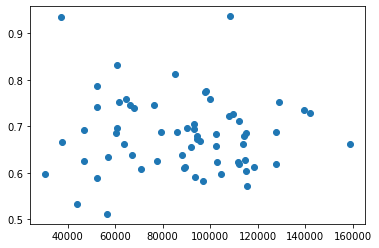

In [35]:
_ = plt.plot(counts,rchi_fixed_par,'o')

In [47]:
rchi[10]

0.59535

In [82]:
with fits.open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23/0203361901-pnS005-obj-os-phs1-reg23.pi') as hdu:
    header=hdu[1].header
    print(list(header.keys()))

['XTENSION', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'PCOUNT', 'GCOUNT', 'TFIELDS', 'EXTNAME', 'TELESCOP', 'INSTRUME', 'SLCTEXPR', 'FILTER', 'HDUCLASS', 'HDUCLAS1', 'HDUCLAS2', 'HDUCLAS3', 'HDUVERS1', 'AREASCAL', 'CORRSCAL', 'POISSERR', 'SYS_ERR', 'CHANTYPE', 'DETCHANS', 'QUALITY', 'GROUPING', 'SPECDELT', 'SPECPIX', 'SPECVAL', 'DSTYP1', 'DSTYP2', 'DSUNI2', 'DSTYP3', 'DSTYP4', 'DSTYP5', 'DSTYP6', 'DSFORM1', 'DSVAL1', 'DSVAL2', 'DSREF2', 'DSVAL3', 'DSVAL4', 'DSREF4', 'DSVAL5', 'DSVAL6', '2DSREF2', '2DSREF4', '2DSVAL5', '3DSREF2', '3DSREF4', '3DSVAL5', '4DSREF2', '4DSREF4', '4DSVAL5', '5DSREF2', '5DSREF4', '5DSVAL5', '6DSREF2', '6DSREF4', '6DSVAL5', '7DSREF2', '7DSREF4', '7DSVAL5', '8DSREF2', '8DSREF4', '8DSVAL5', '9DSREF2', '9DSREF4', '9DSVAL5', '10DSREF2', '10DSREF4', '10DSVAL5', '11DSREF2', '11DSREF4', '11DSVAL5', '12DSREF2', '12DSREF4', '12DSVAL5', 'MTYPE1', 'MFORM1', 'EXPOSURE', 'BACKSCAL', 'TTYPE1', 'TFORM1', 'TTYPE2', 'TFORM2', 'TTYPE3', 'TFORM3', 'TUNIT1', 'TUNIT2', 'TUNIT3']


# Notice pnS005-obj-os-phs1-reg.pi and reg.pi has different units for count

In [87]:
with fits.open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23/0203361901-pnS005-obj-os-phs1-reg23.pi') as hdu:
    header=hdu[1].header
    data=hdu[1].data
    print(data.columns)

ColDefs(
    name = 'CHANNEL'; format = '1J'; unit = 'channel'
    name = 'RATE'; format = '1E'; unit = 'count/s'
    name = 'STAT_ERR'; format = '1E'; unit = 'count/s'
)


In [90]:
with fits.open('/raid2/dxb/xmm/analysis/COSMOS/sicong/xspec/phase1/23/reg23.pi') as hdu:
    header=hdu[1].header
    data=hdu[1].data
    print(data.columns)

ColDefs(
    name = 'CHANNEL'; format = 'J'
    name = 'COUNTS'; format = 'J'; unit = 'count'
    name = 'QUALITY'; format = 'I'
)
